### Notice:

1. Mechanical correctness of your python codes: your codes must be accurate and no errors
2. Clarity of jupyter notebook and organization of outputs:

- The python codes you write must be accompanied with "comments" using # or markdown if necessary
- All outputs must be visible in your jupyter notebook. If necessary, explain the outputs using markdown.

 - A **grade of XF** can result from a breach of academic honesty. The F indicates failure in the course; the X indicates the reason is an Honor Pledge violation.” (http://www.k-state.edu/provost/resources/teaching/course.htm (Links to an external site.)) (See Academic Dishonesty below). 
- **Unauthorized collaboration** (including but not limited to collaborating with other students on lab, HW, the midterm exam, and the final project is forbidden) 
- **Unauthorized aid** (including but not limited to sharing your codes with other students, receiving codes from another)
- Plagiarism (including but not limited to copying words of another (on the Internet or articles) as your own)

**K-State Honor Code**

> **"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

**Your Name: Raksa Ma** 

# Section 1: Business Intelligence

## Part I: Data Import and Quality Assessment

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np
# Classifiers
# import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

# for validating classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Logisticregression classifier model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.feature_selection import RFE

# feature selection
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# regression packages
import sklearn.linear_model as lm

# model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn.cluster import KMeans

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('InsiderPremier_FinalProject.csv')
df.head()

,ISPREMIER,AGE21PLUSINDICATOR,AGE18TO21INDICATOR,AGE13TO18INDICATOR,GENDERCODE,BIRTHDATE,LOYALTYEMAILOFFEROPTININDICATOR,REWARDSEMAILOPTININDICATOR,REWARDSMOBILEOPTININDICATOR,REWARDSSMSOPTININDICATOR,THEATREMOBILEOFFEROPTININDICATOR,THEATRESMSOFFEROPTININDICATOR,LIFETIMEAWARDSEARNEDAMOUNT,LIFETIMESPENDAMOUNT,ONLINEFEESWAIVEDAMOUNT,ESTIMATEDINCOMERANGE,ESTIMATEDHOMEMARKETVALUERANGE,CHILDRENPRESENCE,HASFREQUENTVISITTHEATRENUMBER,TICKETQTYSUM,TICKETBALANCEDUESUM,CONCQTYSUM,CONCLOYDISCOUNTAMTSUM,CONCBALANCEDUESUM
0,1,0,0,0,0,1/26/2016,1,1,0,0,0.0,0,0.0,0.00,0.0,8,19,0,0,2,29.58,0,0.00,0.0
1,1,0,0,1,3,1/1/2001,1,1,1,0,1.0,0,5.0,-63.04,0.0,8,19,3,1,20,191.90,0,0.00,0.0
2,1,1,0,0,0,11/2/1953,1,1,0,0,0.0,0,0.0,34.00,10.0,8,19,1,0,16,192.84,1,-8.49,0.0
3,0,1,0,0,0,5/18/1962,0,0,0,0,0.0,0,0.0,0.00,0.0,8,19,1,0,0,0.00,1,0.00,0.0
4,1,1,0,0,0,10/2/1965,0,0,0,0,0.0,0,0.0,12.08,5.0,8,19,3,1,10,101.20,0,0.00,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47169 entries, 0 to 47168
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ISPREMIER                         47169 non-null  int64  
 1   AGE21PLUSINDICATOR                47169 non-null  int64  
 2   AGE18TO21INDICATOR                47169 non-null  int64  
 3   AGE13TO18INDICATOR                47169 non-null  int64  
 4   GENDERCODE                        47169 non-null  int64  
 5   BIRTHDATE                         47169 non-null  object 
 6   LOYALTYEMAILOFFEROPTININDICATOR   47169 non-null  int64  
 7   REWARDSEMAILOPTININDICATOR        47169 non-null  int64  
 8   REWARDSMOBILEOPTININDICATOR       47169 non-null  int64  
 9   REWARDSSMSOPTININDICATOR          47169 non-null  int64  
 10  THEATREMOBILEOFFEROPTININDICATOR  47166 non-null  float64
 11  THEATRESMSOFFEROPTININDICATOR     47169 non-null  int64  
 12  LIFE

In [4]:
# chech summary statistics
df.describe()

,ISPREMIER,AGE21PLUSINDICATOR,AGE18TO21INDICATOR,AGE13TO18INDICATOR,GENDERCODE,LOYALTYEMAILOFFEROPTININDICATOR,REWARDSEMAILOPTININDICATOR,REWARDSMOBILEOPTININDICATOR,REWARDSSMSOPTININDICATOR,THEATREMOBILEOFFEROPTININDICATOR,THEATRESMSOFFEROPTININDICATOR,LIFETIMEAWARDSEARNEDAMOUNT,LIFETIMESPENDAMOUNT,ONLINEFEESWAIVEDAMOUNT,ESTIMATEDINCOMERANGE,ESTIMATEDHOMEMARKETVALUERANGE,CHILDRENPRESENCE,HASFREQUENTVISITTHEATRENUMBER,TICKETQTYSUM,TICKETBALANCEDUESUM,CONCQTYSUM,CONCLOYDISCOUNTAMTSUM,CONCBALANCEDUESUM
count,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47166.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000,47169.000000
mean,0.115500,0.892641,0.063940,0.038542,2.460790,0.816935,0.859081,0.503063,0.000042,0.508078,0.000042,4.880763,51.872370,4.394210,1.046853,2.114715,2.679090,0.343446,2.309165,23.308845,1.968687,-0.197276,11.328090
std,0.319826,0.309572,0.244649,0.192503,1.081696,0.387819,0.347941,0.499996,0.006512,0.499940,0.006512,30.811081,293.991922,504.096208,2.470228,4.641599,0.810686,0.474864,6.903784,93.359973,4.256716,1.015463,23.849638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-91.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.680000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.940000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,7.980000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,9.200000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,30.780000,3.000000,0.000000,15.190000
max,2.000000,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,804.000000,7902.850000,109350.000000,9.000000,19.000000,3.000000,1.000000,1251.000000,18382.520000,87.000000,0.000000,517.180000


In [5]:
# check null values
df.isnull().sum()

ISPREMIER                           0
AGE21PLUSINDICATOR                  0
AGE18TO21INDICATOR                  0
AGE13TO18INDICATOR                  0
GENDERCODE                          0
BIRTHDATE                           0
LOYALTYEMAILOFFEROPTININDICATOR     0
REWARDSEMAILOPTININDICATOR          0
REWARDSMOBILEOPTININDICATOR         0
REWARDSSMSOPTININDICATOR            0
THEATREMOBILEOFFEROPTININDICATOR    3
THEATRESMSOFFEROPTININDICATOR       0
LIFETIMEAWARDSEARNEDAMOUNT          0
LIFETIMESPENDAMOUNT                 0
ONLINEFEESWAIVEDAMOUNT              0
ESTIMATEDINCOMERANGE                0
ESTIMATEDHOMEMARKETVALUERANGE       0
CHILDRENPRESENCE                    0
HASFREQUENTVISITTHEATRENUMBER       0
TICKETQTYSUM                        0
TICKETBALANCEDUESUM                 0
CONCQTYSUM                          0
CONCLOYDISCOUNTAMTSUM               0
CONCBALANCEDUESUM                   0
dtype: int64

In [6]:
# drop null values

df = df.dropna()

In [7]:
df.isnull().sum()

ISPREMIER                           0
AGE21PLUSINDICATOR                  0
AGE18TO21INDICATOR                  0
AGE13TO18INDICATOR                  0
GENDERCODE                          0
BIRTHDATE                           0
LOYALTYEMAILOFFEROPTININDICATOR     0
REWARDSEMAILOPTININDICATOR          0
REWARDSMOBILEOPTININDICATOR         0
REWARDSSMSOPTININDICATOR            0
THEATREMOBILEOFFEROPTININDICATOR    0
THEATRESMSOFFEROPTININDICATOR       0
LIFETIMEAWARDSEARNEDAMOUNT          0
LIFETIMESPENDAMOUNT                 0
ONLINEFEESWAIVEDAMOUNT              0
ESTIMATEDINCOMERANGE                0
ESTIMATEDHOMEMARKETVALUERANGE       0
CHILDRENPRESENCE                    0
HASFREQUENTVISITTHEATRENUMBER       0
TICKETQTYSUM                        0
TICKETBALANCEDUESUM                 0
CONCQTYSUM                          0
CONCLOYDISCOUNTAMTSUM               0
CONCBALANCEDUESUM                   0
dtype: int64

In [8]:
# check values in ISPREMIER
df['ISPREMIER'].value_counts()

ISPREMIER
0    41722
1     5441
2        3
Name: count, dtype: int64

In [9]:
# column to counts

columns = ['AGE21PLUSINDICATOR', 'AGE18TO21INDICATOR', 'AGE13TO18INDICATOR', 'GENDERCODE', 'LOYALTYEMAILOFFEROPTININDICATOR',
          'REWARDSEMAILOPTININDICATOR', 'REWARDSMOBILEOPTININDICATOR', 'REWARDSSMSOPTININDICATOR', 'THEATREMOBILEOFFEROPTININDICATOR',
          'THEATRESMSOFFEROPTININDICATOR', 'ESTIMATEDINCOMERANGE', 'ESTIMATEDHOMEMARKETVALUERANGE', 'CHILDRENPRESENCE',
          'HASFREQUENTVISITTHEATRENUMBER']

for c in columns:
    print(df[c].value_counts())

AGE21PLUSINDICATOR
1    42102
0     5064
Name: count, dtype: int64
AGE18TO21INDICATOR
0    44150
1     3016
Name: count, dtype: int64
AGE13TO18INDICATOR
0    45348
1     1818
Name: count, dtype: int64
GENDERCODE
3    37455
0     6012
1     3699
Name: count, dtype: int64
LOYALTYEMAILOFFEROPTININDICATOR
1    38522
0     8642
5        2
Name: count, dtype: int64
REWARDSEMAILOPTININDICATOR
1    40520
0     6646
Name: count, dtype: int64
REWARDSMOBILEOPTININDICATOR
1    23729
0    23437
Name: count, dtype: int64
REWARDSSMSOPTININDICATOR
0    47164
1        2
Name: count, dtype: int64
THEATREMOBILEOFFEROPTININDICATOR
1.0    23964
0.0    23202
Name: count, dtype: int64
THEATRESMSOFFEROPTININDICATOR
0    47164
1        2
Name: count, dtype: int64
ESTIMATEDINCOMERANGE
0    39158
6     2090
9     1460
7     1373
5      809
8      666
4      662
3      435
1      288
2      225
Name: count, dtype: int64
ESTIMATEDHOMEMARKETVALUERANGE
0     37074
17      864
7       861
6       828
5       822
8   

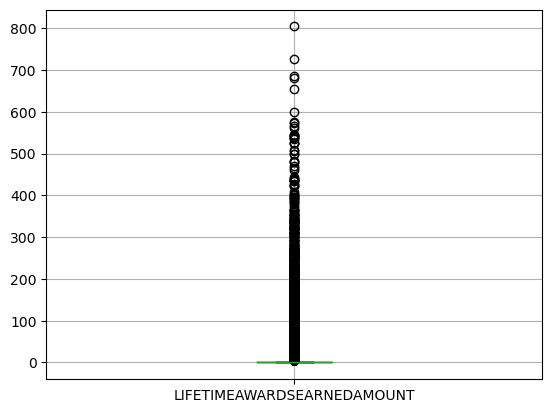

In [10]:
df.boxplot('LIFETIMEAWARDSEARNEDAMOUNT')
plt.show();

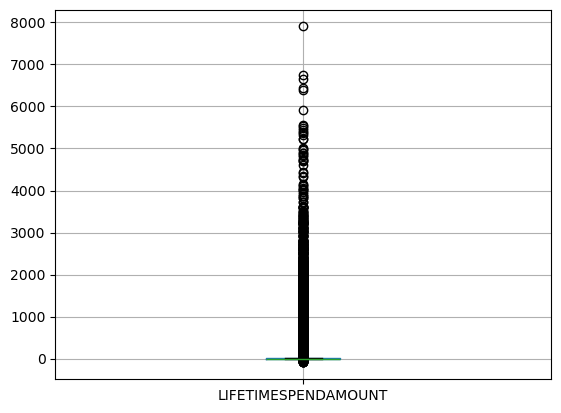

In [11]:
df.boxplot('LIFETIMESPENDAMOUNT')
plt.show();

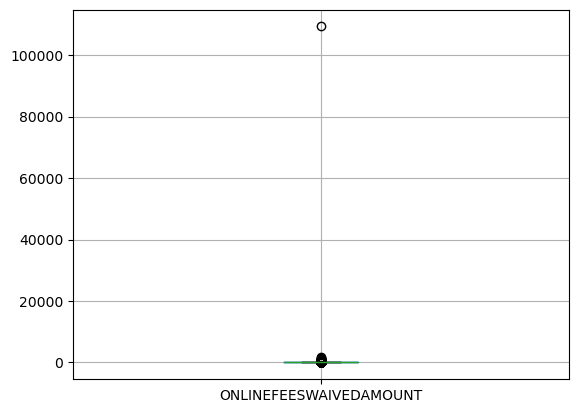

In [12]:
df.boxplot('ONLINEFEESWAIVEDAMOUNT')
plt.show();

In [13]:
df['ONLINEFEESWAIVEDAMOUNT'].value_counts()

ONLINEFEESWAIVEDAMOUNT
0.00      37351
2.50       3959
5.00       1339
3.75       1068
1.25        625
          ...  
756.25        1
235.00        1
168.00        1
141.00        1
260.00        1
Name: count, Length: 275, dtype: int64

In [14]:
df['ONLINEFEESWAIVEDAMOUNT'].max()

109350.0

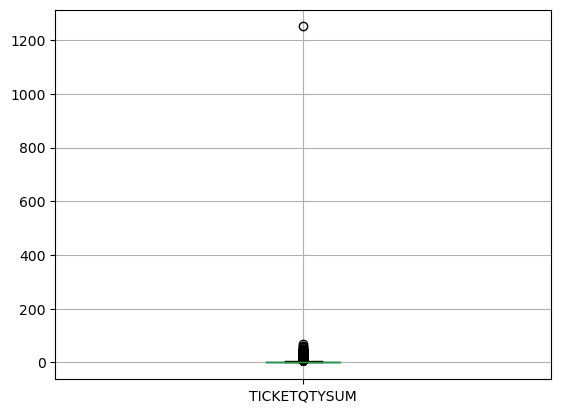

In [15]:
df.boxplot('TICKETQTYSUM')
plt.show();

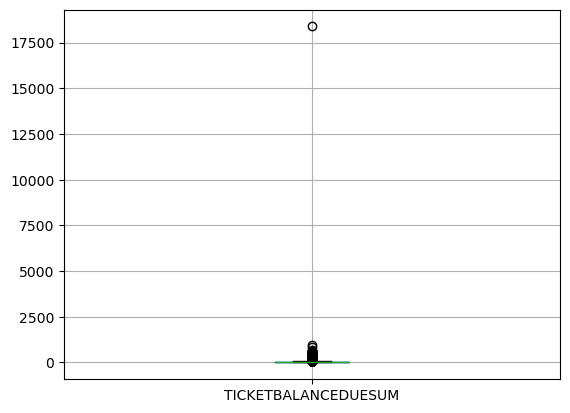

In [16]:
df.boxplot('TICKETBALANCEDUESUM')
plt.show();

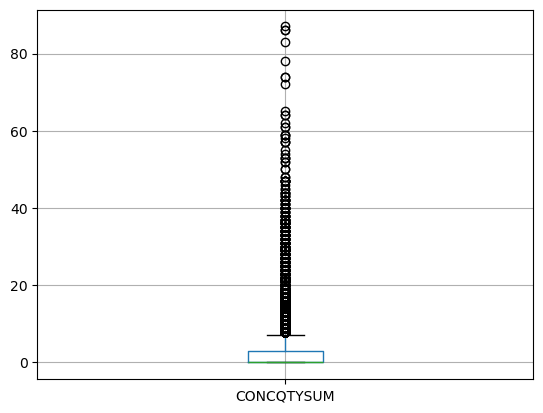

In [17]:
df.boxplot('CONCQTYSUM')
plt.show();

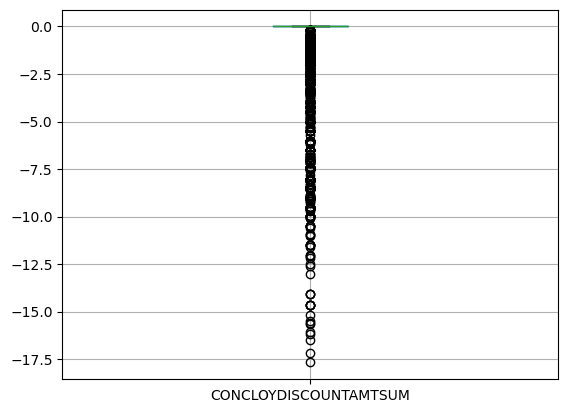

In [18]:
df.boxplot('CONCLOYDISCOUNTAMTSUM')
plt.show();

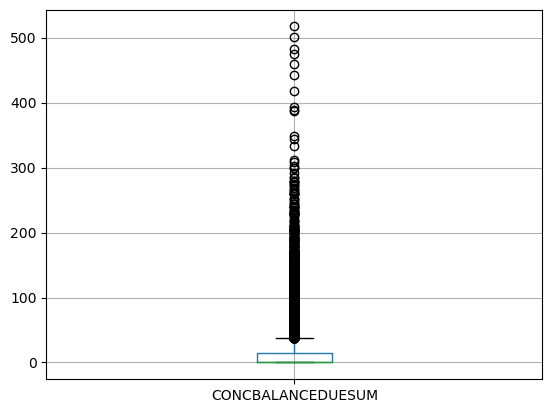

In [19]:
df.boxplot('CONCBALANCEDUESUM')
plt.show();

## Part II: Data Cleaning and Transformation

In [20]:
# a. Renaming columns

df = df.rename(columns={
    
'AGE21PLUSINDICATOR': 'AGE21PLUS', 'AGE18TO21INDICATOR': 'AGE18TO21','AGE13TO18INDICATOR': 'AGE13TO18',
'LOYALTYEMAILOFFEROPTININDICATOR': 'LOYALTY_EMAIL_OFFER', 'REWARDSEMAILOPTININDICATOR': 'REWARD_EMAIL',
'REWARDSMOBILEOPTININDICATOR': 'REWARD_MOBILE', 'REWARDSSMSOPTININDICATOR': 'REWARD_SMS',
'THEATREMOBILEOFFEROPTININDICATOR': 'THEATR_MOB_OFFER', 'THEATRESMSOFFEROPTININDICATOR': 'THEATR_SMS_OFFER',
'LIFETIMEAWARDSEARNEDAMOUNT': 'LIFE_AWARD_AMT', 'LIFETIMESPENDAMOUNT': 'LIFE_SPEND_AMT',
'ONLINEFEESWAIVEDAMOUNT': 'OL_FEE_WAIVE_AMT', 'ESTIMATEDINCOMERANGE': 'EST_INC_RNG',
'ESTIMATEDHOMEMARKETVALUERANGE': 'EST_HOME_VAL_RNG', 'CHILDRENPRESENCE': 'CHILD_PRES',
'HASFREQUENTVISITTHEATRENUMBER': 'FREQ_THEATRE', 'TICKETQTYSUM': 'TICKET_QTY',
'TICKETBALANCEDUESUM': 'TICKET_BAL', 'CONCLOYDISCOUNTAMTSUM': 'CONCLOYDISC', 'CONCBALANCEDUESUM': 'CONC_BAL'
    
})

df.head()

,ISPREMIER,AGE21PLUS,AGE18TO21,AGE13TO18,GENDERCODE,BIRTHDATE,LOYALTY_EMAIL_OFFER,REWARD_EMAIL,REWARD_MOBILE,REWARD_SMS,THEATR_MOB_OFFER,THEATR_SMS_OFFER,LIFE_AWARD_AMT,LIFE_SPEND_AMT,OL_FEE_WAIVE_AMT,EST_INC_RNG,EST_HOME_VAL_RNG,CHILD_PRES,FREQ_THEATRE,TICKET_QTY,TICKET_BAL,CONCQTYSUM,CONCLOYDISC,CONC_BAL
0,1,0,0,0,0,1/26/2016,1,1,0,0,0.0,0,0.0,0.00,0.0,8,19,0,0,2,29.58,0,0.00,0.0
1,1,0,0,1,3,1/1/2001,1,1,1,0,1.0,0,5.0,-63.04,0.0,8,19,3,1,20,191.90,0,0.00,0.0
2,1,1,0,0,0,11/2/1953,1,1,0,0,0.0,0,0.0,34.00,10.0,8,19,1,0,16,192.84,1,-8.49,0.0
3,0,1,0,0,0,5/18/1962,0,0,0,0,0.0,0,0.0,0.00,0.0,8,19,1,0,0,0.00,1,0.00,0.0
4,1,1,0,0,0,10/2/1965,0,0,0,0,0.0,0,0.0,12.08,5.0,8,19,3,1,10,101.20,0,0.00,0.0


In [21]:
# b. Convert column names to lowercase
df.columns = df.columns.str.lower()
df.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,birthdate,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal
0,1,0,0,0,0,1/26/2016,1,1,0,0,0.0,0,0.0,0.00,0.0,8,19,0,0,2,29.58,0,0.00,0.0
1,1,0,0,1,3,1/1/2001,1,1,1,0,1.0,0,5.0,-63.04,0.0,8,19,3,1,20,191.90,0,0.00,0.0
2,1,1,0,0,0,11/2/1953,1,1,0,0,0.0,0,0.0,34.00,10.0,8,19,1,0,16,192.84,1,-8.49,0.0
3,0,1,0,0,0,5/18/1962,0,0,0,0,0.0,0,0.0,0.00,0.0,8,19,1,0,0,0.00,1,0.00,0.0
4,1,1,0,0,0,10/2/1965,0,0,0,0,0.0,0,0.0,12.08,5.0,8,19,3,1,10,101.20,0,0.00,0.0


In [22]:
# find categorical and numerical columns

for col in df.columns:
    print(col, df[col].nunique())

ispremier 3
age21plus 2
age18to21 2
age13to18 2
gendercode 3
birthdate 18096
loyalty_email_offer 3
reward_email 2
reward_mobile 2
reward_sms 2
theatr_mob_offer 2
theatr_sms_offer 2
life_award_amt 255
life_spend_amt 5038
ol_fee_waive_amt 275
est_inc_rng 10
est_home_val_rng 20
child_pres 3
freq_theatre 2
ticket_qty 56
ticket_bal 6965
concqtysum 67
concloydisc 153
conc_bal 5987


In [23]:
for col in df.columns:
    if df[col].nunique() < 30:
        print(col, df[col].unique())

ispremier [1 0 2]
age21plus [0 1]
age18to21 [0 1]
age13to18 [0 1]
gendercode [0 3 1]
loyalty_email_offer [1 0 5]
reward_email [1 0]
reward_mobile [0 1]
reward_sms [0 1]
theatr_mob_offer [0. 1.]
theatr_sms_offer [0 1]
est_inc_rng [8 2 3 4 5 6 7 9 1 0]
est_home_val_rng [19  5  1  6  7  8  9 10 11  2 12 13 14 15 16 17  3 18  4  0]
child_pres [0 3 1]
freq_theatre [0 1]


`ispremier, age21plus, age18to21, age13to18, gendercode, loyalty_email_offer, reward_email, reward_mobile, reward_sms, theatr_mob_offer, theatr_sms_offer, est_inc_rng, est_home_val_rng, child_pres, and freq_theatre` are categorical variable

`life_award_amt, life_spend_amt, ol_fee_waive_amt, ticket_qty, ticket_bal, concqtysum, concloydisc, conc_bal` are numerical variable

In [24]:
# d. data types

df.dtypes

ispremier                int64
age21plus                int64
age18to21                int64
age13to18                int64
gendercode               int64
birthdate               object
loyalty_email_offer      int64
reward_email             int64
reward_mobile            int64
reward_sms               int64
theatr_mob_offer       float64
theatr_sms_offer         int64
life_award_amt         float64
life_spend_amt         float64
ol_fee_waive_amt       float64
est_inc_rng              int64
est_home_val_rng         int64
child_pres               int64
freq_theatre             int64
ticket_qty               int64
ticket_bal             float64
concqtysum               int64
concloydisc            float64
conc_bal               float64
dtype: object

In [25]:
# e. basic staitstics

df.describe()

,ispremier,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal
count,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000,47166.000000
mean,0.115486,0.892635,0.063944,0.038545,2.460756,0.816944,0.859093,0.503095,0.000042,0.508078,0.000042,4.881073,51.875364,4.394437,1.046411,2.113641,2.679239,0.343468,2.309100,23.307722,1.968812,-0.197288,11.328811
std,0.319810,0.309581,0.244656,0.192509,1.081722,0.387811,0.347929,0.499996,0.006512,0.499940,0.006512,30.812036,294.001030,504.112238,2.469684,4.639793,0.810487,0.474871,6.903973,93.362435,4.256822,1.015494,23.850225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-91.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.680000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.940000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,7.980000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,9.200000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,30.780000,3.000000,0.000000,15.190000
max,2.000000,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,804.000000,7902.850000,109350.000000,9.000000,19.000000,3.000000,1.000000,1251.000000,18382.520000,87.000000,0.000000,517.180000


In [26]:
# f. Change data types 
# convert theatr_mob_offer to integer

df['theatr_mob_offer'] = df['theatr_mob_offer'].astype(int)

In [27]:
# convert birthdate to date

from datetime import datetime

df['birthdate'] = pd.to_datetime(df['birthdate'])
df.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,birthdate,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal
0,1,0,0,0,0,2016-01-26,1,1,0,0,0,0,0.0,0.00,0.0,8,19,0,0,2,29.58,0,0.00,0.0
1,1,0,0,1,3,2001-01-01,1,1,1,0,1,0,5.0,-63.04,0.0,8,19,3,1,20,191.90,0,0.00,0.0
2,1,1,0,0,0,1953-11-02,1,1,0,0,0,0,0.0,34.00,10.0,8,19,1,0,16,192.84,1,-8.49,0.0
3,0,1,0,0,0,1962-05-18,0,0,0,0,0,0,0.0,0.00,0.0,8,19,1,0,0,0.00,1,0.00,0.0
4,1,1,0,0,0,1965-10-02,0,0,0,0,0,0,0.0,12.08,5.0,8,19,3,1,10,101.20,0,0.00,0.0


In [28]:
df.dtypes

ispremier                       int64
age21plus                       int64
age18to21                       int64
age13to18                       int64
gendercode                      int64
birthdate              datetime64[ns]
loyalty_email_offer             int64
reward_email                    int64
reward_mobile                   int64
reward_sms                      int64
theatr_mob_offer                int64
theatr_sms_offer                int64
life_award_amt                float64
life_spend_amt                float64
ol_fee_waive_amt              float64
est_inc_rng                     int64
est_home_val_rng                int64
child_pres                      int64
freq_theatre                    int64
ticket_qty                      int64
ticket_bal                    float64
concqtysum                      int64
concloydisc                   float64
conc_bal                      float64
dtype: object

In [29]:
# g. Create new columns

df['unk_inc'] = 0
df.loc[df['est_inc_rng'] == 0, 'unk_inc'] = 1
df[['est_inc_rng', 'unk_inc']]

,est_inc_rng,unk_inc
0,8,0
1,8,0
2,8,0
3,8,0
4,8,0
...,...,...
47164,0,1
47165,0,1
47166,0,1
47167,0,1


In [30]:
df['unk_home'] = 0
df.loc[df['est_home_val_rng'] == 0, 'unk_home'] = 1
df[['est_home_val_rng', 'unk_home']]

,est_home_val_rng,unk_home
0,19,0
1,19,0
2,19,0
3,19,0
4,19,0
...,...,...
47164,0,1
47165,0,1
47166,0,1
47167,0,1


In [31]:
# h. create a new column 'Age'

# Calculate age
current_date = datetime.now()
df['age'] = (current_date - df['birthdate']).dt.days // 365

df[['birthdate', 'age']].head()

,birthdate,age
0,2016-01-26,8
1,2001-01-01,23
2,1953-11-02,71
3,1962-05-18,62
4,1965-10-02,59


In [32]:
# drop rows that have 2 in ispremier column

df = df[df['ispremier'] != 2]
df['ispremier'].value_counts()

ispremier
0    41722
1     5441
Name: count, dtype: int64

In [33]:
# drop rows that have 5 in column 'loyalty_email_offer'

df = df[df['loyalty_email_offer'] != 5]
df['loyalty_email_offer'].value_counts()

loyalty_email_offer
1    38519
0     8642
Name: count, dtype: int64

In [34]:
# remove outliers in ol_fee_waive_amt column
df = df[df['ol_fee_waive_amt'] < 2000]
df.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,birthdate,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,1,0,0,0,0,2016-01-26,1,1,0,0,0,0,0.0,0.00,0.0,8,19,0,0,2,29.58,0,0.00,0.0,0,0,8
1,1,0,0,1,3,2001-01-01,1,1,1,0,1,0,5.0,-63.04,0.0,8,19,3,1,20,191.90,0,0.00,0.0,0,0,23
2,1,1,0,0,0,1953-11-02,1,1,0,0,0,0,0.0,34.00,10.0,8,19,1,0,16,192.84,1,-8.49,0.0,0,0,71
3,0,1,0,0,0,1962-05-18,0,0,0,0,0,0,0.0,0.00,0.0,8,19,1,0,0,0.00,1,0.00,0.0,0,0,62
4,1,1,0,0,0,1965-10-02,0,0,0,0,0,0,0.0,12.08,5.0,8,19,3,1,10,101.20,0,0.00,0.0,0,0,59


In [35]:
df.columns

Index(['ispremier', 'age21plus', 'age18to21', 'age13to18', 'gendercode',
       'birthdate', 'loyalty_email_offer', 'reward_email', 'reward_mobile',
       'reward_sms', 'theatr_mob_offer', 'theatr_sms_offer', 'life_award_amt',
       'life_spend_amt', 'ol_fee_waive_amt', 'est_inc_rng', 'est_home_val_rng',
       'child_pres', 'freq_theatre', 'ticket_qty', 'ticket_bal', 'concqtysum',
       'concloydisc', 'conc_bal', 'unk_inc', 'unk_home', 'age'],
      dtype='object')

## Part III: Business Intelligence

In [36]:
# Pivot table grouped by ISPREMIER

df.groupby('ispremier')['ticket_qty'].mean()

ispremier
0    1.656112
1    7.088603
Name: ticket_qty, dtype: float64

In [37]:
# ispremier and freq_theatre

g = df.groupby(['ispremier','freq_theatre']).size().unstack()
g

freq_theatre,0,1
ispremier,,
0,26706,15014
1,4258,1182


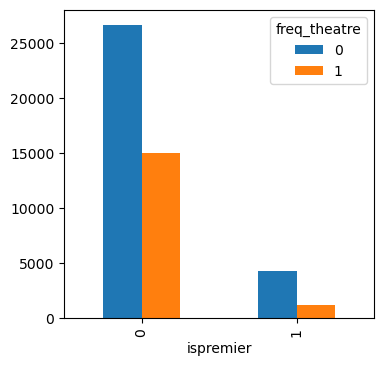

In [38]:
g.plot(kind='bar', figsize=(4, 4));

In [39]:
# Pivot table grouped by 'ISPREMIER','UNK_HOME'

df.groupby(['ispremier', 'unk_home'])[['life_award_amt', 'life_spend_amt', 'ol_fee_waive_amt', 
                                       'ticket_qty', 'ticket_bal', 'concqtysum', 'concloydisc', 'conc_bal']].mean()

life_award_amt  life_spend_amt  ol_fee_waive_amt  \
ispremier unk_home                                                     
0         0              11.388493      114.574572          3.370502   
          1               0.321113        7.692750          1.038526   
1         0              53.310814      518.444259         12.236770   
          1               5.932613       64.422459          3.263893   

                    ticket_qty  ticket_bal  concqtysum  concloydisc   conc_bal  
ispremier unk_home                                                              
0         0           2.398294   23.096058    1.705577    -0.142652   9.673755  
          1           1.477656   14.910633    1.389082    -0.057500   8.024797  
1         0           8.798802   87.480404    7.683974    -1.419206  43.985282  
          1           6.091941   63.253608    4.925807    -0.981990  28.495278

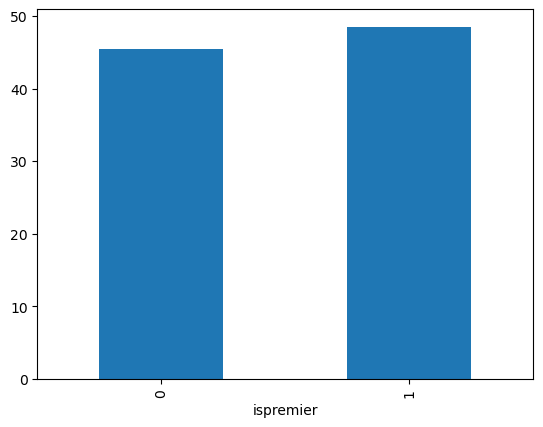

In [40]:
# Visualization of ISPREMIER with variables like AGE

df.groupby('ispremier')['age'].mean().plot(kind = 'bar');

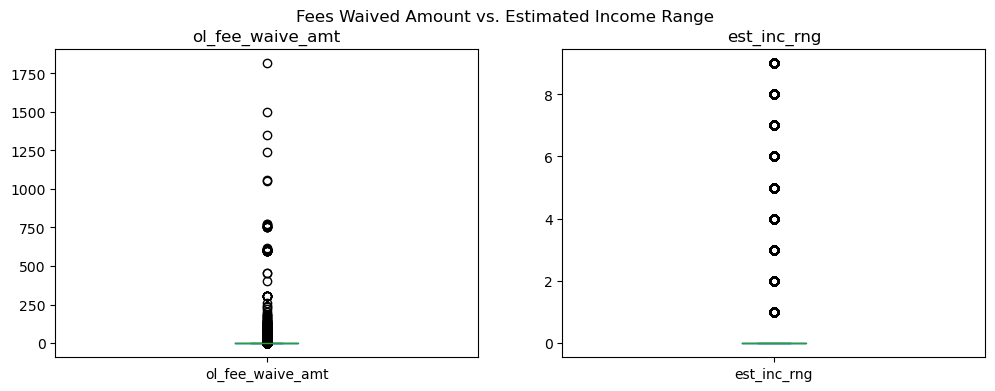

In [41]:
# Visualizing Online Fees Waived Amount vs. Estimated Income Range

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

fig.suptitle('Fees Waived Amount vs. Estimated Income Range')

df['ol_fee_waive_amt'].plot(kind='box', ax=ax1)
ax1.set_title('ol_fee_waive_amt')

df['est_inc_rng'].plot(kind='box', ax=ax2)
ax2.set_title('est_inc_rng');

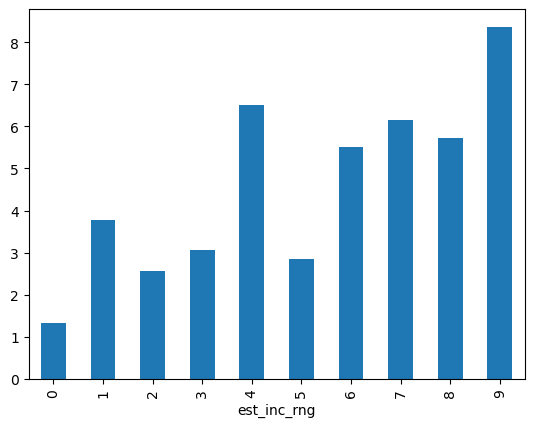

In [42]:
df.groupby('est_inc_rng')['ol_fee_waive_amt'].mean().plot(kind = 'bar');

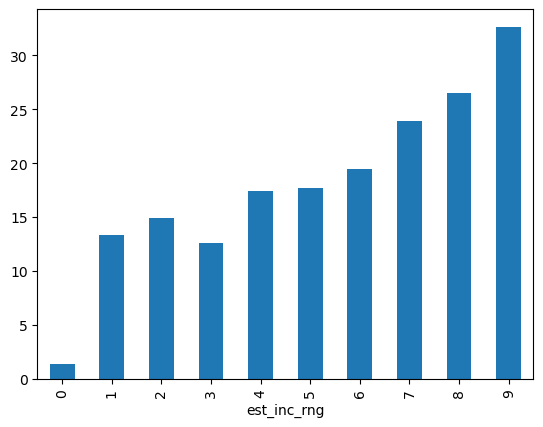

In [43]:
# Visualizing Average Lifetime Awards Amount vs. Estimated Income Range

df.groupby('est_inc_rng')['life_award_amt'].mean().plot(kind = 'bar');

In [44]:
# Visualizing % Membership By Loyalty Email Offer Opt-In

g = df.groupby(['loyalty_email_offer','ispremier']).size().unstack()
g.T

loyalty_email_offer,0,1
ispremier,,
0,7748,33972
1,894,4546


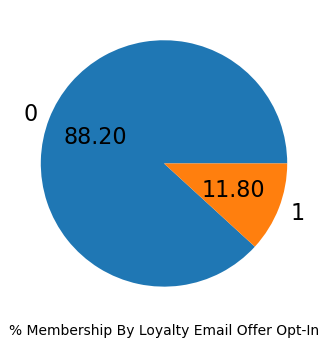

In [45]:
g.T[1].plot(kind='pie', labels=['0','1'], 
       autopct='%.2f', fontsize=16, figsize=(4, 4))

plt.xlabel("% Membership By Loyalty Email Offer Opt-In")
plt.ylabel("");

In [46]:
# Visualizing % Membership By Reward Email Opt-In

g = df.groupby(['reward_email','ispremier']).size().unstack()
g.T

reward_email,0,1
ispremier,,
0,5967,35753
1,678,4762


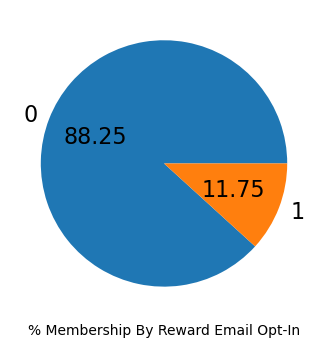

In [47]:
g.T[1].plot(kind='pie', labels=['0','1'], 
       autopct='%.2f', fontsize=16, figsize=(4, 4))

plt.xlabel("% Membership By Reward Email Opt-In")
plt.ylabel("");

In [48]:
# Visualizing % Membership By Reward Mobile Opt-In

g = df.groupby(['reward_mobile','ispremier']).size().unstack()
g.T

reward_mobile,0,1
ispremier,,
0,21456,20264
1,1978,3462


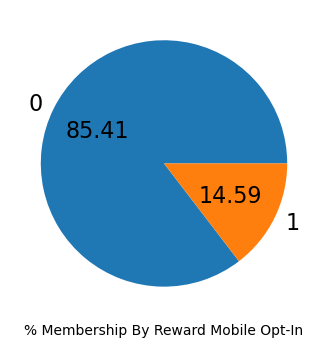

In [49]:
g.T[1].plot(kind='pie', labels=['0','1'], 
       autopct='%.2f', fontsize=16, figsize=(4, 4))

plt.xlabel("% Membership By Reward Mobile Opt-In")
plt.ylabel("");

In [50]:
# Visualizing % Membership By other variables

g = df.groupby(['reward_sms','ispremier']).size().unstack()
g.T

reward_sms,0,1
ispremier,,
0,41718.0,2.0
1,5440.0,NaN


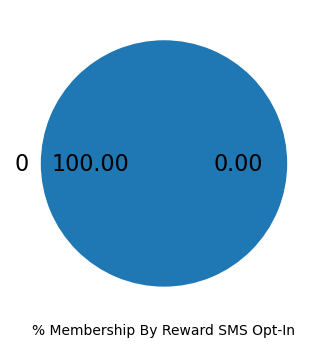

In [51]:
g = df.groupby(['reward_sms','ispremier']).size().unstack()
g.T


g.T[1].plot(kind='pie', labels=['0','1'], 
       autopct='%.2f', fontsize=16, figsize=(4, 4))

plt.xlabel("% Membership By Reward SMS Opt-In")
plt.ylabel("");

In [52]:
# Visualizing % Membership By other variables

g = df.groupby(['gendercode','ispremier']).size().unstack()
g.T

gendercode,0,1,3
ispremier,,,
0,4469,2435,34816
1,1543,1264,2633


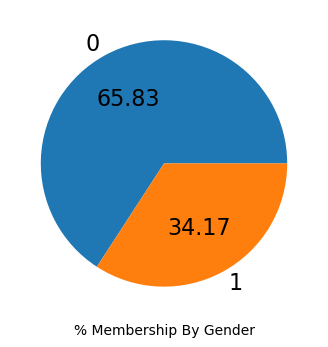

In [53]:
g.T[1].plot(kind='pie', labels=['0','1'], 
       autopct='%.2f', fontsize=16, figsize=(4, 4))

plt.xlabel("% Membership By Gender")
plt.ylabel("");

In [54]:
# Visualizing % Membership By other variables

g = df.groupby(['est_inc_rng','ispremier']).size().unstack()
g.T

est_inc_rng,0,1,2,3,4,5,6,7,8,9
ispremier,,,,,,,,,,
0,35381,250,178,358,529,639,1686,1077,501,1121
1,3773,38,47,77,133,170,404,296,165,337


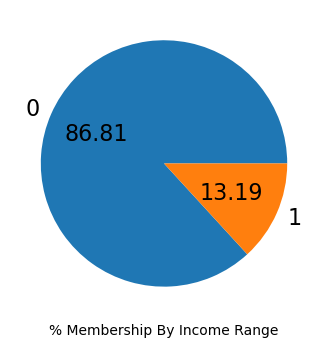

In [55]:

g.T[1].plot(kind='pie', labels=['0','1'], 
       autopct='%.2f', fontsize=16, figsize=(4, 4))

plt.xlabel("% Membership By Income Range")
plt.ylabel("");

In [56]:
df.head()

,ispremier,age21plus,age18to21,age13to18,gendercode,birthdate,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,1,0,0,0,0,2016-01-26,1,1,0,0,0,0,0.0,0.00,0.0,8,19,0,0,2,29.58,0,0.00,0.0,0,0,8
1,1,0,0,1,3,2001-01-01,1,1,1,0,1,0,5.0,-63.04,0.0,8,19,3,1,20,191.90,0,0.00,0.0,0,0,23
2,1,1,0,0,0,1953-11-02,1,1,0,0,0,0,0.0,34.00,10.0,8,19,1,0,16,192.84,1,-8.49,0.0,0,0,71
3,0,1,0,0,0,1962-05-18,0,0,0,0,0,0,0.0,0.00,0.0,8,19,1,0,0,0.00,1,0.00,0.0,0,0,62
4,1,1,0,0,0,1965-10-02,0,0,0,0,0,0,0.0,12.08,5.0,8,19,3,1,10,101.20,0,0.00,0.0,0,0,59


In [57]:
g = df.groupby(['ispremier','loyalty_email_offer','gendercode']).size().unstack()
g

gendercode                        0     1      3
ispremier loyalty_email_offer                   
0         0                     916   761   6071
          1                    3553  1674  28745
1         0                     274   276    344
          1                    1269   988   2289

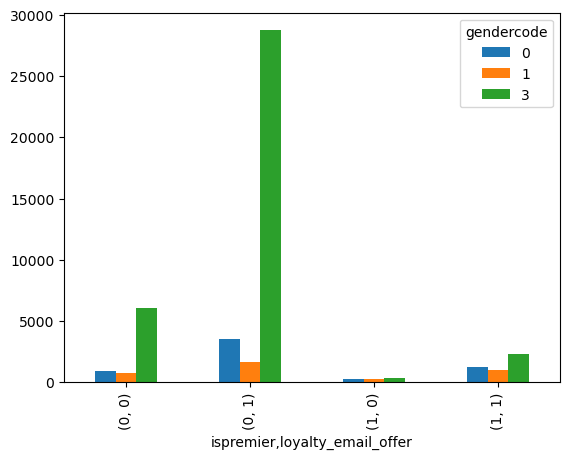

In [58]:
g.plot(kind='bar');  

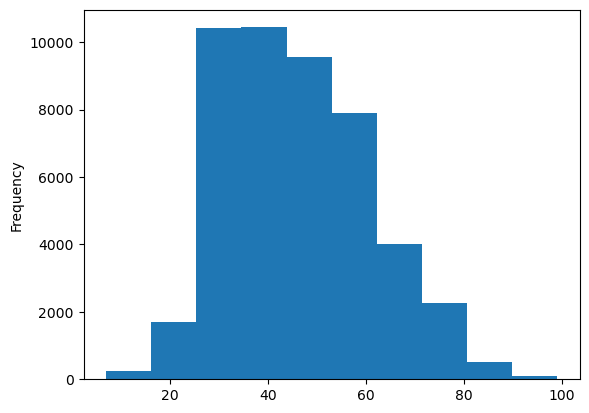

In [59]:
df['age'].plot(kind='hist');

In [60]:
m = df.loc[df['gendercode'] == 1]     # select male only  
f = df.loc[df['gendercode'] == 0]   # select female only

print(len(m), len(f))

3699 6012


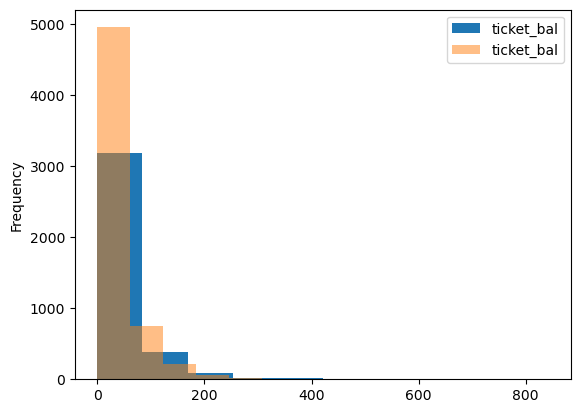

In [61]:
m['ticket_bal'].plot(kind='hist')
f['ticket_bal'].plot(kind='hist', alpha=0.5)
plt.legend();

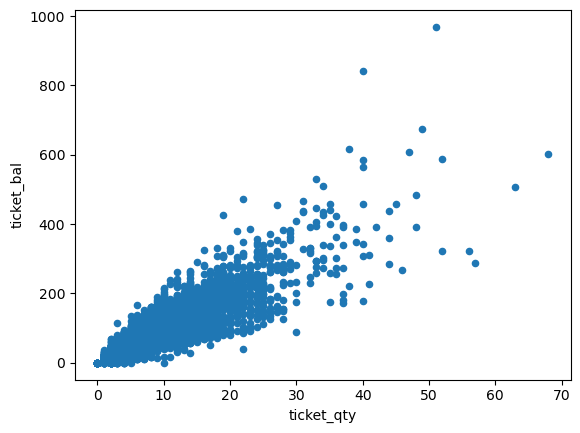

In [62]:
df.plot.scatter(x='ticket_qty', y='ticket_bal');

In [63]:
g = df.groupby(['ispremier','gendercode', 'est_inc_rng'])['ticket_bal'].mean().unstack()
g

est_inc_rng                   0          1          2           3          4  \
ispremier gendercode                                                           
0         0           20.706282  21.293623  18.143673   18.831134  16.632453   
          1           22.907187  23.202667   7.354286   18.953437  23.065577   
          3           14.318078  19.101854  27.444261   18.893188  17.503365   
1         0           61.776734  87.170833  58.680909   80.356667  64.633023   
          1           63.750257  69.643333  86.929091  128.499500  73.704848   
          3           69.031318  83.939500  77.110000   86.761333  80.390000   

est_inc_rng                   5          6           7           8          9  
ispremier gendercode                                                           
0         0           22.620769  21.487775   23.803656   27.173016  28.771111  
          1           22.753385  28.049820   28.153643   29.173134  27.196644  
          3           19.799898  23.538881   26.034574   20.606981  27.901286  
1         0           73.030000  78.181721   81.393878   91.779000  87.759794  
          1           67.900476  91.797474  109.370877  113.797857  97.333710  
          3           81.570395  85.009733   82.248440   85.292410  99.756629

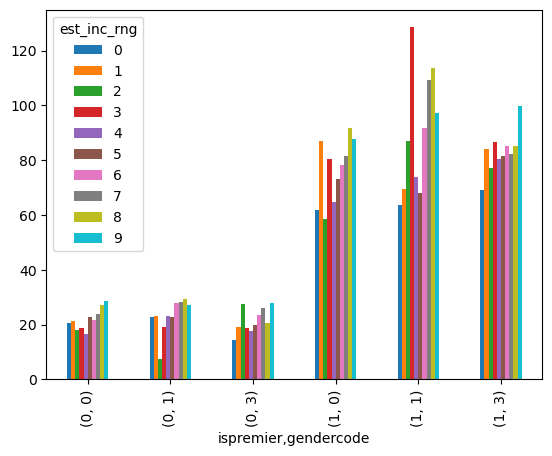

In [64]:
g.plot.bar();

In [65]:
# Correlation Analysis

df.corr(numeric_only = True)

,ispremier,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,freq_theatre,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
ispremier,1.000000,0.061117,-0.055839,-0.055066,-0.259138,0.017651,0.016887,0.096272,-0.002352,0.101845,-0.002352,0.216834,0.220818,0.065084,0.131800,0.136754,-0.109447,-0.095928,0.454072,0.448853,0.337078,-0.336250,0.346359,-0.131457,-0.135818,0.066264
age21plus,0.061117,1.000000,-0.752172,-0.575610,-0.046004,-0.021209,-0.011299,-0.018882,-0.008260,-0.018441,-0.008260,0.039310,0.040136,0.014902,0.066929,0.053479,-0.054918,0.036750,0.070464,0.064973,0.048401,-0.030233,0.050379,-0.068877,-0.057999,0.490349
age18to21,-0.055839,-0.752172,1.000000,-0.050079,0.031252,-0.000337,-0.003283,-0.006039,-0.001702,-0.006390,-0.001702,-0.036611,-0.037044,-0.014373,-0.049853,-0.038213,0.043311,-0.012674,-0.052176,-0.044480,-0.044927,0.028619,-0.045644,0.050525,0.040173,-0.332568
age13to18,-0.055066,-0.575610,-0.050079,1.000000,0.038535,0.031074,0.021262,0.031583,-0.001304,0.031794,-0.001304,-0.024838,-0.026183,-0.013729,-0.053166,-0.044250,0.044720,-0.039049,-0.066343,-0.062236,-0.039095,0.026105,-0.040653,0.056220,0.051558,-0.298141
gendercode,-0.259138,-0.046004,0.031252,0.038535,1.000000,0.049819,0.015170,0.288533,0.003247,0.275459,0.003247,-0.018737,-0.020634,-0.033290,-0.211992,-0.243985,0.198542,0.042093,-0.161997,-0.157970,-0.030162,0.097428,-0.025567,0.230374,0.284606,-0.019533
loyalty_email_offer,0.017651,-0.021209,-0.000337,0.031074,0.049819,1.000000,0.790407,0.417744,0.003085,0.421306,0.003085,-0.004211,-0.004992,-0.031634,-0.062442,-0.085140,0.049800,-0.035679,-0.055908,-0.091446,0.123020,-0.038165,0.127490,0.060137,0.080195,0.045670
reward_email,0.016887,-0.011299,-0.003283,0.021262,0.015170,0.790407,1.000000,0.346554,0.002637,0.350141,0.002637,-0.016538,-0.016890,-0.029104,-0.061785,-0.078482,0.049921,-0.021168,-0.050504,-0.078028,0.101335,-0.029904,0.105138,0.061028,0.079254,0.037278
reward_mobile,0.096272,-0.018882,-0.006039,0.031583,0.288533,0.417744,0.346554,1.000000,-0.000040,0.981345,-0.000040,0.008933,0.009714,-0.033788,-0.201038,-0.220908,0.187614,0.038838,-0.003593,-0.030995,0.216114,-0.064719,0.224293,0.216190,0.257423,0.047712
reward_sms,-0.002352,-0.008260,-0.001702,-0.001304,0.003247,0.003085,0.002637,-0.000040,1.000000,-0.006618,1.000000,0.024336,0.023447,-0.000020,0.015702,0.017390,-0.013494,0.002147,-0.002186,-0.002947,-0.003012,0.001265,-0.003093,-0.014402,-0.012483,-0.005037
theatr_mob_offer,0.101845,-0.018441,-0.006390,0.031794,0.275459,0.421306,0.350141,0.981345,-0.006618,1.000000,-0.006618,0.005988,0.006734,-0.033200,-0.196678,-0.216896,0.183468,0.038243,-0.000424,-0.029462,0.217078,-0.067565,0.224755,0.211118,0.251482,0.049204


In [66]:
df.corr(numeric_only = True)['ispremier']

ispremier              1.000000
age21plus              0.061117
age18to21             -0.055839
age13to18             -0.055066
gendercode            -0.259138
loyalty_email_offer    0.017651
reward_email           0.016887
reward_mobile          0.096272
reward_sms            -0.002352
theatr_mob_offer       0.101845
theatr_sms_offer      -0.002352
life_award_amt         0.216834
life_spend_amt         0.220818
ol_fee_waive_amt       0.065084
est_inc_rng            0.131800
est_home_val_rng       0.136754
child_pres            -0.109447
freq_theatre          -0.095928
ticket_qty             0.454072
ticket_bal             0.448853
concqtysum             0.337078
concloydisc           -0.336250
conc_bal               0.346359
unk_inc               -0.131457
unk_home              -0.135818
age                    0.066264
Name: ispremier, dtype: float64

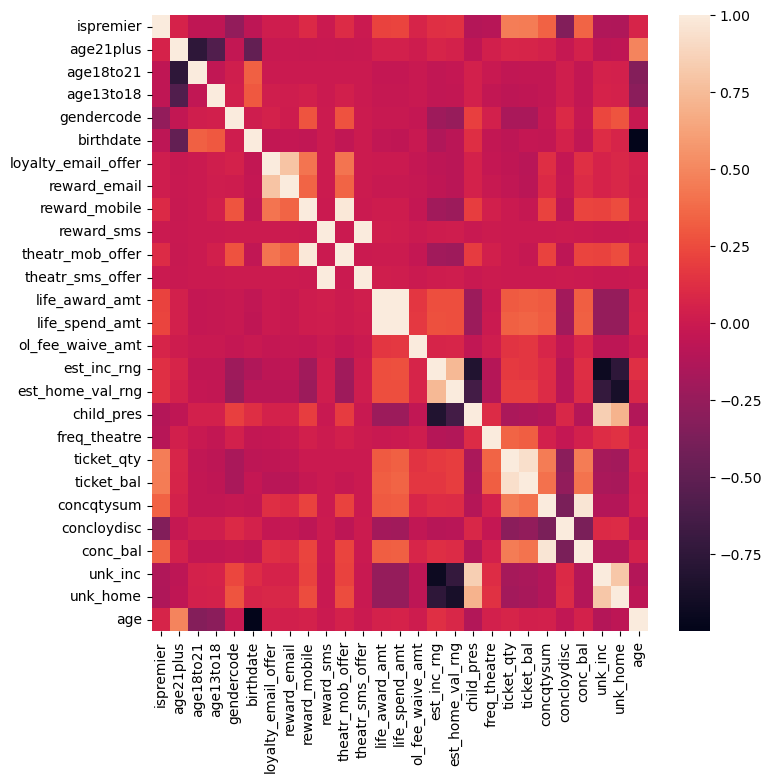

In [67]:
# heatmap

import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr());

## Part IV: Storytelling

### Who are the customers that are likely to convert to Premier?

Customers are likely to covert to Premier by having the following characteristics:

- customers who spend more
- are frequent ticket purchasers
- have high ticket balances
- spending more on concessions 
- higher-income individuals 
- tech-savvy customers engaging with mobile offers
- older customers
- earn more loyalty rewards

### Who are the customers that utilize Premier?

Customers who utilize Premier have the following characteristics:

- slightly older customers
- higher socioeconomic status (high income range and high home market value)
- higher lifetime spend amount
- higher ticket balance
- higher ticket quantity 
- higher concession quantity 
- higher concession balance 
- more likely to opt-in to mobile-related offers Theatre Mobile Offer Opt-In, Reward Mobile Opt-In 
- accumulate significant loyalty rewards

### Who are the customers that utilize Insider?

Customers who utilize Insider have the following characteristics:

- likely younger customers
- lower Estimated Income Range and Estimated Home Market Value
- lower lifetime spend amount and ticket balance
- lower concession quantity and concession balance
- customers who visit frequently but spend less
- less likely to opt-in to advanced features like Mobile and Reward Mobile Offers and Loyalty Email Offers
- accumulate fewer loyalty rewards
- more likely to have children

# Section 2: Machine Learning

## Part I: Classification

In [68]:
df.columns

Index(['ispremier', 'age21plus', 'age18to21', 'age13to18', 'gendercode',
       'birthdate', 'loyalty_email_offer', 'reward_email', 'reward_mobile',
       'reward_sms', 'theatr_mob_offer', 'theatr_sms_offer', 'life_award_amt',
       'life_spend_amt', 'ol_fee_waive_amt', 'est_inc_rng', 'est_home_val_rng',
       'child_pres', 'freq_theatre', 'ticket_qty', 'ticket_bal', 'concqtysum',
       'concloydisc', 'conc_bal', 'unk_inc', 'unk_home', 'age'],
      dtype='object')

In [69]:
# convert categorical variables to dummy variables

df_new =  pd.get_dummies(df, columns=['age21plus', 'age18to21', 'age13to18', 'gendercode', 'loyalty_email_offer', 'reward_email',
                                     'reward_mobile', 'reward_sms', 'theatr_mob_offer', 'theatr_sms_offer', 'est_inc_rng',
                                     'est_home_val_rng', 'child_pres', 'freq_theatre', 'unk_inc', 'unk_home'],
                         prefix=['age21plus', 'age18to21', 'age13to18', 'gendercode', 'loyalty_email_offer', 'reward_email',
                                     'reward_mobile', 'reward_sms', 'theatr_mob_offer', 'theatr_sms_offer', 'est_inc_rng',
                                     'est_home_val_rng', 'child_pres', 'freq_theatre', 'unk_inc', 'unk_home'],
                         drop_first=True)
df_new.head(2)

,ispremier,birthdate,life_award_amt,life_spend_amt,ol_fee_waive_amt,ticket_qty,ticket_bal,concqtysum,concloydisc,conc_bal,age,age21plus_1,age18to21_1,age13to18_1,gendercode_1,gendercode_3,loyalty_email_offer_1,reward_email_1,reward_mobile_1,reward_sms_1,theatr_mob_offer_1,theatr_sms_offer_1,est_inc_rng_1,est_inc_rng_2,est_inc_rng_3,est_inc_rng_4,est_inc_rng_5,est_inc_rng_6,est_inc_rng_7,est_inc_rng_8,est_inc_rng_9,est_home_val_rng_1,est_home_val_rng_2,est_home_val_rng_3,est_home_val_rng_4,est_home_val_rng_5,est_home_val_rng_6,est_home_val_rng_7,est_home_val_rng_8,est_home_val_rng_9,est_home_val_rng_10,est_home_val_rng_11,est_home_val_rng_12,est_home_val_rng_13,est_home_val_rng_14,est_home_val_rng_15,est_home_val_rng_16,est_home_val_rng_17,est_home_val_rng_18,est_home_val_rng_19,child_pres_1,child_pres_3,freq_theatre_1,unk_inc_1,unk_home_1
0,1,2016-01-26,0.0,0.00,0.0,2,29.58,0,0.0,0.0,8,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,1,2001-01-01,5.0,-63.04,0.0,20,191.90,0,0.0,0.0,23,False,False,True,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False


In [70]:
# Drop column birthdate
df_new.drop('birthdate', axis=1, inplace=True)

In [71]:
# declare X variables and y variable

y = df_new['ispremier']
X = df_new.drop(['ispremier'], axis = 1)

print(len(y), len(X))

47160 47160


In [72]:
# split validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33012, 53) (14148, 53) (33012,) (14148,)


### a) Simple Decision Tree 

In [73]:
# Intialize the model
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Fit the model
dt_simple.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [74]:
# Print performance of the model

print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test)))

0.9467769296013571
--------------------------------------------------------
[[12364   199]
 [  554  1031]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12563
           1       0.84      0.65      0.73      1585

    accuracy                           0.95     14148
   macro avg       0.90      0.82      0.85     14148
weighted avg       0.94      0.95      0.94     14148

--------------------------------------------------------
0.817316510277162


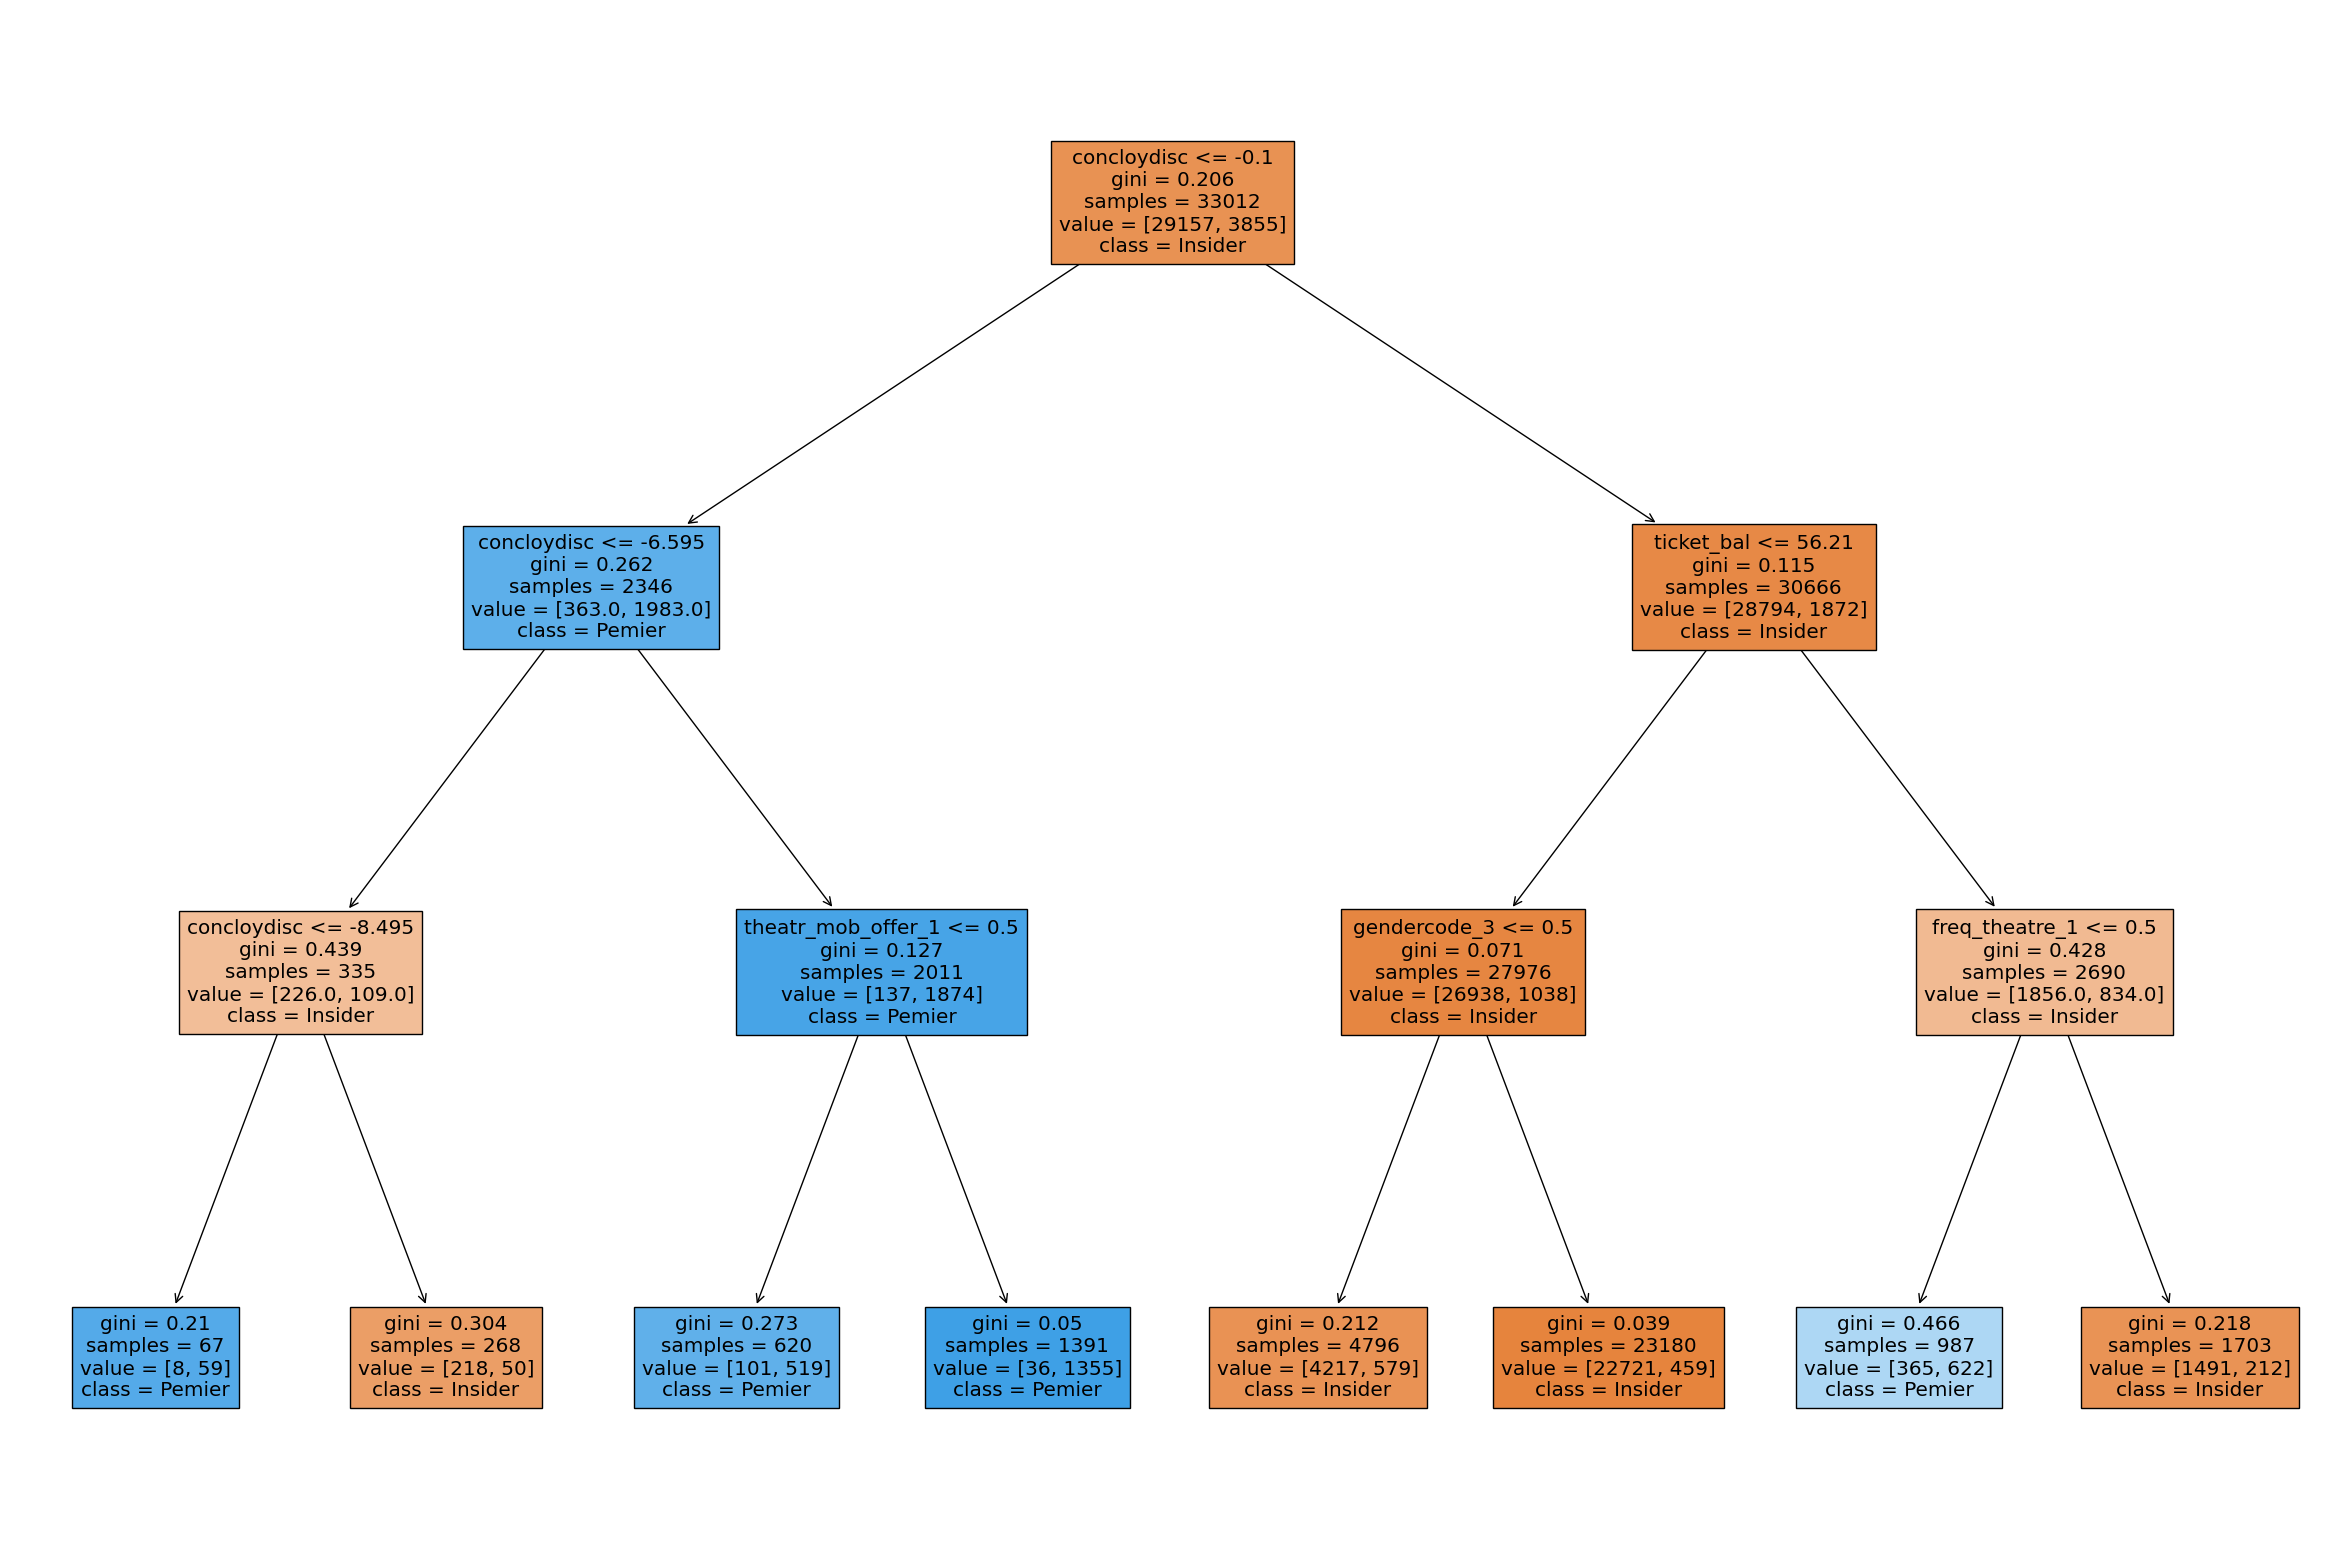

In [75]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(dt_simple, 
                feature_names = X.columns, 
                class_names=['Insider','Pemier'],    
                filled = True);

In [76]:
text_representation = tree.export_text(dt_simple, feature_names=(list(X.columns)))
print(text_representation)

|--- concloydisc <= -0.10
|   |--- concloydisc <= -6.60
|   |   |--- concloydisc <= -8.49
|   |   |   |--- class: 1
|   |   |--- concloydisc >  -8.49
|   |   |   |--- class: 0
|   |--- concloydisc >  -6.60
|   |   |--- theatr_mob_offer_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- theatr_mob_offer_1 >  0.50
|   |   |   |--- class: 1
|--- concloydisc >  -0.10
|   |--- ticket_bal <= 56.21
|   |   |--- gendercode_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- gendercode_3 >  0.50
|   |   |   |--- class: 0
|   |--- ticket_bal >  56.21
|   |   |--- freq_theatre_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- freq_theatre_1 >  0.50
|   |   |   |--- class: 0



Most important variables from the simple decision tree are:
- concloydisc
- theatr_mob_offer_1
- ticket_bal
- gendercode_3
- freq_theatre_1

Importan decision rules
- Customers with a Concession Loyalty Discount (concloydisc) less than or equal to -8.49 are classified as class: 1.
- Customers with a Concession Loyalty Discount greater than -0.10 (lower or no discounts) and a Ticket Balance exceeding 56.21 are classified as class: 1 if they are not frequent theatergoers (freq_theatre_1 <= 0.50).

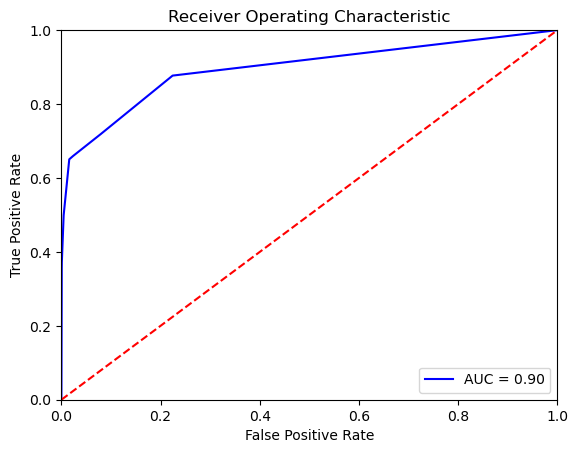

In [77]:
# calculate the fpr and tpr for all thresholds of the classification

preds = dt_simple.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### b) Logistic Regression

In [78]:
# Initialize the model 
lr = LogisticRegression(solver='lbfgs', max_iter=500)

# Fit the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [79]:
# print coefficients
coef = pd.DataFrame(list(zip(X.columns, np.transpose(lr.coef_))), 
             columns=['X variables', 'coef']).sort_values('coef', ascending=False)

coef['coef'] = coef['coef'].str[0]
coef

,X variables,coef
18,theatr_mob_offer_1,0.831710
16,reward_mobile_1,0.753180
52,unk_home_1,0.454428
12,gendercode_1,0.276286
3,ticket_qty,0.173893
0,life_award_amt,0.108929
4,ticket_bal,0.025653
7,conc_bal,0.018322
8,age,0.010120
17,reward_sms_1,-0.000629


In [80]:
# Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.9285411365564037
[[12285   278]
 [  733   852]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12563
           1       0.75      0.54      0.63      1585

    accuracy                           0.93     14148
   macro avg       0.85      0.76      0.79     14148
weighted avg       0.92      0.93      0.92     14148

0.7577054798390245


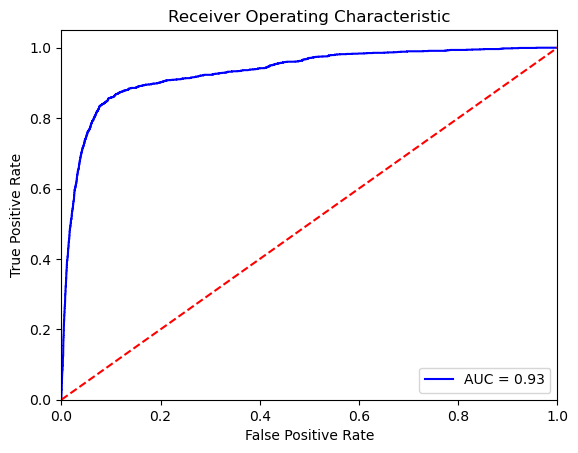

In [81]:
preds = lr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### c. Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    # building 20 decision trees
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9657195363302233

In [83]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9657195363302233
[[12424   139]
 [  346  1239]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12563
           1       0.90      0.78      0.84      1585

    accuracy                           0.97     14148
   macro avg       0.94      0.89      0.91     14148
weighted avg       0.96      0.97      0.96     14148



`concloydisc`, `ticket_bal`, `life_spend_amt`, `ticket_qty` and `freq_theatre_1` are top five most important variable based on the following

In [84]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
concloydisc,0.216614
ticket_bal,0.130443
life_spend_amt,0.088025
ticket_qty,0.087693
freq_theatre_1,0.069078
conc_bal,0.060528
age,0.051030
concqtysum,0.048615
reward_mobile_1,0.046401
gendercode_3,0.031712


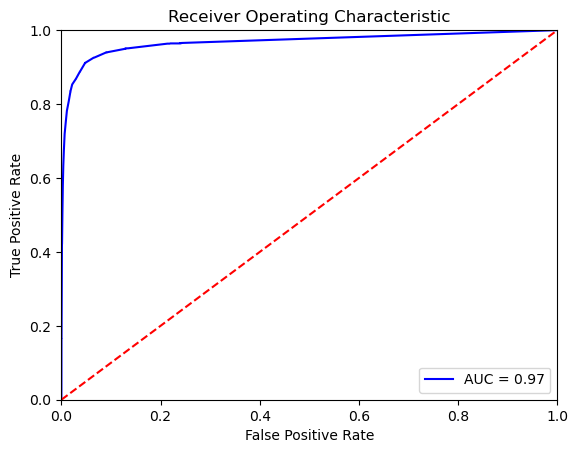

In [85]:
# calculate the fpr and tpr for all thresholds of the classification

preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### d) Feature Selection: Recursive Feature Selection (RFE)

In [86]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5, step=1)  # asking five best attributes
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

[False False False False False False False False False  True  True  True
 False  True False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
[44 45 47  8 40 33  4 42 46  1  1  1  5  1 16 20  2 49  1 48 10 41 14 29
 31 13 18 19 36 21  6  7 30 27 24 32 28 43 26 25 38 39 23 17 37 34 35 15
 22 12  3 11  9]


In [87]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,life_award_amt,44
1,life_spend_amt,45
2,ol_fee_waive_amt,47
3,ticket_qty,8
4,ticket_bal,40
5,concqtysum,33
6,concloydisc,4
7,conc_bal,42
8,age,46
9,age21plus_1,1


In [88]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: x, rfe.ranking_), X.columns)))

Features sorted by their rank:
[(1, 'age13to18_1'), (1, 'age18to21_1'), (1, 'age21plus_1'), (1, 'gendercode_3'), (1, 'theatr_mob_offer_1'), (2, 'reward_mobile_1'), (3, 'freq_theatre_1'), (4, 'concloydisc'), (5, 'gendercode_1'), (6, 'est_home_val_rng_2'), (7, 'est_home_val_rng_3'), (8, 'ticket_qty'), (9, 'unk_home_1'), (10, 'est_inc_rng_1'), (11, 'unk_inc_1'), (12, 'child_pres_3'), (13, 'est_inc_rng_6'), (14, 'est_inc_rng_3'), (15, 'est_home_val_rng_19'), (16, 'loyalty_email_offer_1'), (17, 'est_home_val_rng_15'), (18, 'est_inc_rng_7'), (19, 'est_inc_rng_8'), (20, 'reward_email_1'), (21, 'est_home_val_rng_1'), (22, 'child_pres_1'), (23, 'est_home_val_rng_14'), (24, 'est_home_val_rng_6'), (25, 'est_home_val_rng_11'), (26, 'est_home_val_rng_10'), (27, 'est_home_val_rng_5'), (28, 'est_home_val_rng_8'), (29, 'est_inc_rng_4'), (30, 'est_home_val_rng_4'), (31, 'est_inc_rng_5'), (32, 'est_home_val_rng_7'), (33, 'concqtysum'), (34, 'est_home_val_rng_17'), (35, 'est_home_val_rng_18'), (36, 'est_

In [89]:
X_logistic = df_new[['age13to18_1', 'age18to21_1', 'age21plus_1', 'gendercode_3', 'theatr_mob_offer_1']]
print(X_logistic.head())

   age13to18_1  age18to21_1  age21plus_1  gendercode_3  theatr_mob_offer_1
0        False        False        False         False               False
1         True        False        False          True                True
2        False        False         True         False               False
3        False        False         True         False               False
4        False        False         True         False               False


In [90]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train_n, y_train_n)

# Model evaluation
print(metrics.accuracy_score(y_test_n, lr.predict(X_test_n)))
print(metrics.confusion_matrix(y_test_n, lr.predict(X_test_n)))
print(metrics.classification_report(y_test_n, lr.predict(X_test_n)))
print(metrics.roc_auc_score(y_test_n, lr.predict(X_test_n)))

0.9052869663556686
[[12360   203]
 [ 1137   448]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12563
           1       0.69      0.28      0.40      1585

    accuracy                           0.91     14148
   macro avg       0.80      0.63      0.67     14148
weighted avg       0.89      0.91      0.89     14148

0.6332456407089969


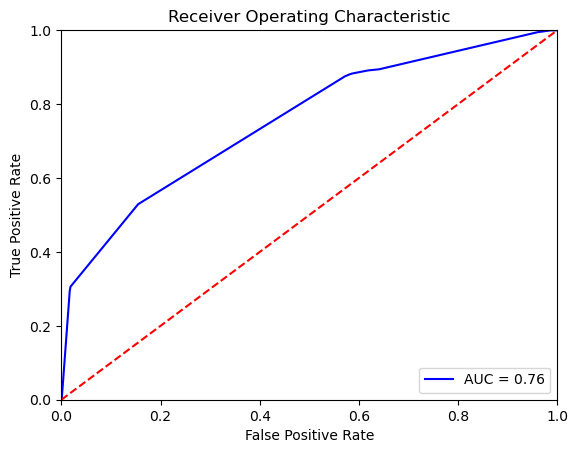

In [91]:
# calculate the fpr and tpr for all thresholds of the classification

preds = lr.predict_proba(X_test_n)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_n, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Create ROC plot to compare the performance of DT, LR, and RF

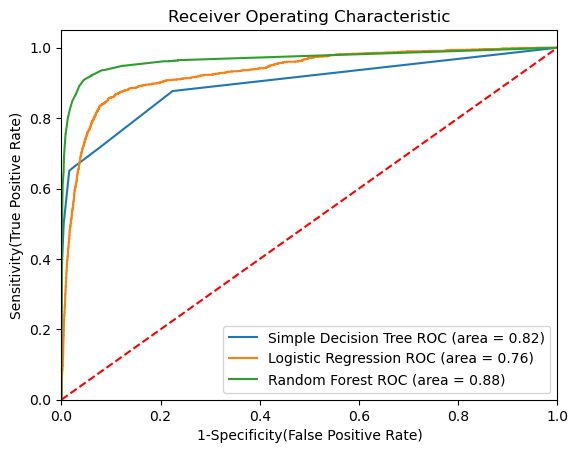

In [92]:
plt.figure()

# models
models = [
{
    'label': 'Simple Decision Tree',
    'model': DecisionTreeClassifier(max_depth=3, min_samples_leaf=5),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=500),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=20),
},
]

# Below for loop iterates through models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

My best classification model is `Random Forest`.

a) 96% model accuracy 

b) True Positive Rate = 1243 / (1243 + 342) = 78.41%, False Positive Rate = 147 / (147 + 12416) = 1.17% 

c) ROC score of 0.97

## Part II: Regression

In [93]:
df.columns

Index(['ispremier', 'age21plus', 'age18to21', 'age13to18', 'gendercode',
       'birthdate', 'loyalty_email_offer', 'reward_email', 'reward_mobile',
       'reward_sms', 'theatr_mob_offer', 'theatr_sms_offer', 'life_award_amt',
       'life_spend_amt', 'ol_fee_waive_amt', 'est_inc_rng', 'est_home_val_rng',
       'child_pres', 'freq_theatre', 'ticket_qty', 'ticket_bal', 'concqtysum',
       'concloydisc', 'conc_bal', 'unk_inc', 'unk_home', 'age'],
      dtype='object')

In [94]:
# Remove 'TICKET_QTY', 'FREQ_THEATRE', 'ISPREMIER', 'BIRTHDATE' columns

df_reg = df.drop(['ticket_qty', 'freq_theatre', 'ispremier', 'birthdate'], axis=1)
df_reg.head()

,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,0,0,0,0,1,1,0,0,0,0,0.0,0.00,0.0,8,19,0,29.58,0,0.00,0.0,0,0,8
1,0,0,1,3,1,1,1,0,1,0,5.0,-63.04,0.0,8,19,3,191.90,0,0.00,0.0,0,0,23
2,1,0,0,0,1,1,0,0,0,0,0.0,34.00,10.0,8,19,1,192.84,1,-8.49,0.0,0,0,71
3,1,0,0,0,0,0,0,0,0,0,0.0,0.00,0.0,8,19,1,0.00,1,0.00,0.0,0,0,62
4,1,0,0,0,0,0,0,0,0,0,0.0,12.08,5.0,8,19,3,101.20,0,0.00,0.0,0,0,59


In [95]:
df_reg.columns

Index(['age21plus', 'age18to21', 'age13to18', 'gendercode',
       'loyalty_email_offer', 'reward_email', 'reward_mobile', 'reward_sms',
       'theatr_mob_offer', 'theatr_sms_offer', 'life_award_amt',
       'life_spend_amt', 'ol_fee_waive_amt', 'est_inc_rng', 'est_home_val_rng',
       'child_pres', 'ticket_bal', 'concqtysum', 'concloydisc', 'conc_bal',
       'unk_inc', 'unk_home', 'age'],
      dtype='object')

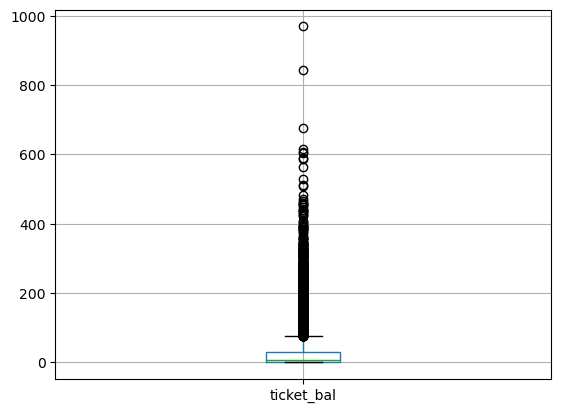

In [96]:
df_reg.boxplot('ticket_bal')
plt.show();

In [97]:
df_reg.describe()['ticket_bal']

count    47160.000000
mean        22.919700
std         39.625157
min          0.000000
25%          0.000000
50%          7.980000
75%         30.780000
max        969.090000
Name: ticket_bal, dtype: float64

In [98]:
ticket_bal = df_reg[df_reg['ticket_bal'] > 600]
ticket_bal['ticket_bal']

1223     607.53
5938     842.00
6270     616.61
26703    602.50
28338    675.66
31627    969.09
Name: ticket_bal, dtype: float64

In [99]:
# remove rows containing ticket_bal > 600
df_reg = df_reg[df_reg['ticket_bal'] < 600]

### a) Linear Regression Model

In [100]:
# assigning columns to X and Y variables
y_reg = df_reg['ticket_bal'] 
X_reg = df_reg.drop(['ticket_bal'], axis = 1) 

In [101]:
# split validation (70% training & 30% testing data)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=0)

print(X_train_reg.shape, y_train_reg.shape, X_test_reg.shape, y_test_reg.shape)

(33007, 22) (33007,) (14147, 22) (14147,)


In [102]:
# Define numerical and categorical columns

num_cols = df_reg.select_dtypes(include=[np.number]).drop(columns=['ticket_bal']).columns
cat_cols = df_reg.select_dtypes(include=[object]).columns  

print(num_cols, cat_cols)

Index(['age21plus', 'age18to21', 'age13to18', 'gendercode',
       'loyalty_email_offer', 'reward_email', 'reward_mobile', 'reward_sms',
       'theatr_mob_offer', 'theatr_sms_offer', 'life_award_amt',
       'life_spend_amt', 'ol_fee_waive_amt', 'est_inc_rng', 'est_home_val_rng',
       'child_pres', 'concqtysum', 'concloydisc', 'conc_bal', 'unk_inc',
       'unk_home', 'age'],
      dtype='object') Index([], dtype='object')


In [103]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_reg[num_cols])
X_test_num_scaled = scaler.transform(X_test_reg[num_cols])

In [104]:
# Convert the scaled numerical features back to a DataFrame
X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train_reg.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test_reg.index)

In [105]:
X_train_num_df.head()

,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
19306,0.346769,-0.260001,-0.201185,-1.351543,0.474940,0.405249,-1.004159,-0.007784,-1.014496,-0.007784,-0.159295,-0.168833,-0.081065,-0.423220,-0.455284,0.395712,-0.462101,0.194599,-0.472379,0.450956,0.521061,-0.670492
28171,0.346769,-0.260001,-0.201185,0.498321,0.474940,0.405249,0.995858,-0.007784,0.985711,-0.007784,-0.159295,-0.155026,-0.081065,-0.423220,-0.455284,0.395712,-0.462101,0.194599,-0.472379,0.450956,0.521061,0.555082
3345,0.346769,-0.260001,-0.201185,-2.276475,0.474940,0.405249,0.995858,-0.007784,0.985711,-0.007784,-0.159295,-0.148452,0.007216,3.223564,1.266257,-2.067283,0.004274,-1.260223,0.114235,-2.217511,-1.919159,1.372131
38223,0.346769,-0.260001,-0.201185,0.498321,-2.105529,-2.467617,-1.004159,-0.007784,-1.014496,-0.007784,-0.159295,-0.176722,-0.081065,-0.423220,-0.455284,0.395712,-0.462101,0.194599,-0.472379,0.450956,0.521061,-0.466230
16467,0.346769,-0.260001,-0.201185,-2.276475,0.474940,0.405249,-1.004159,-0.007784,-1.014496,-0.007784,-0.159295,-0.170148,0.007216,-0.423220,-0.455284,0.395712,-0.462101,0.194599,-0.472379,0.450956,0.521061,-0.125793


In [106]:
# select only 5 X variables

k = 5  # Number of top features to select
selector = SelectKBest(f_regression, k=k)

X_train_selected = selector.fit_transform(X_train_num_df, y_train_reg)
X_test_selected = selector.transform(X_test_num_df)

In [107]:
# what are those two columns?
selected_feature_indices = selector.get_support(indices=True)
selected_feature_indices

array([10, 11, 16, 17, 18])

In [108]:
X_train_num_df.head(2)

,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
19306,0.346769,-0.260001,-0.201185,-1.351543,0.47494,0.405249,-1.004159,-0.007784,-1.014496,-0.007784,-0.159295,-0.168833,-0.081065,-0.42322,-0.455284,0.395712,-0.462101,0.194599,-0.472379,0.450956,0.521061,-0.670492
28171,0.346769,-0.260001,-0.201185,0.498321,0.47494,0.405249,0.995858,-0.007784,0.985711,-0.007784,-0.159295,-0.155026,-0.081065,-0.42322,-0.455284,0.395712,-0.462101,0.194599,-0.472379,0.450956,0.521061,0.555082


In [109]:
X_train_num_df.columns

Index(['age21plus', 'age18to21', 'age13to18', 'gendercode',
       'loyalty_email_offer', 'reward_email', 'reward_mobile', 'reward_sms',
       'theatr_mob_offer', 'theatr_sms_offer', 'life_award_amt',
       'life_spend_amt', 'ol_fee_waive_amt', 'est_inc_rng', 'est_home_val_rng',
       'child_pres', 'concqtysum', 'concloydisc', 'conc_bal', 'unk_inc',
       'unk_home', 'age'],
      dtype='object')

f_regression determines that `'life_award_amt', 'life_spend_amt', 'concqtysum', 'concloydisc', 'conc_bal'` are top 5 most important vairables

In [110]:
# Model Building

model = lm.LinearRegression()
model.fit(X_train_selected, y_train_reg)
model_y = model.predict(X_test_selected)

# Model Evaluation
print("mean square error: ", mean_squared_error(y_test_reg, model_y))
print("variance or r-squared: ", explained_variance_score(y_test_reg, model_y))

mean square error:  1080.5255295029133
variance or r-squared:  0.26577607113051616


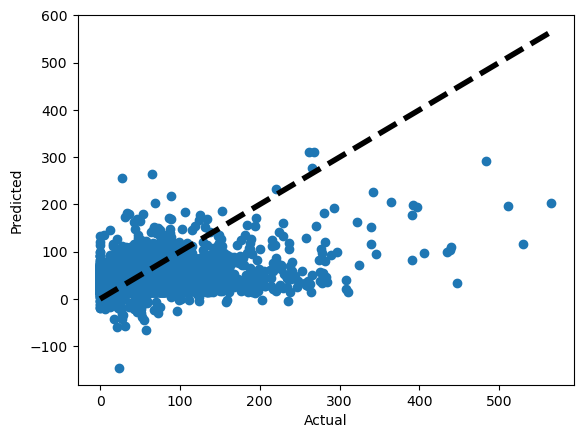

In [111]:
plt.subplots()
plt.scatter(y_test_reg, model_y)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### b) RandomForestRegressor

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# model building
regr = RandomForestRegressor(random_state=0)

# fit the model 
regr.fit(X_train_num_df, y_train_reg)

regr_predicted = regr.predict(X_test_num_df)

print("mean square error: ", mean_squared_error(y_test_reg, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y_test_reg, regr_predicted))

mean square error:  672.1912207928387
variance or r-squared:  0.5433376205638908


In [113]:
feature_importances = pd.DataFrame(regr.feature_importances_, index = X_train_reg.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
life_spend_amt,5.011310e-01
conc_bal,1.134603e-01
ol_fee_waive_amt,1.037867e-01
age,7.394508e-02
concloydisc,5.024273e-02
concqtysum,3.183046e-02
life_award_amt,2.596226e-02
est_home_val_rng,2.477802e-02
gendercode,1.586460e-02
est_inc_rng,1.358696e-02


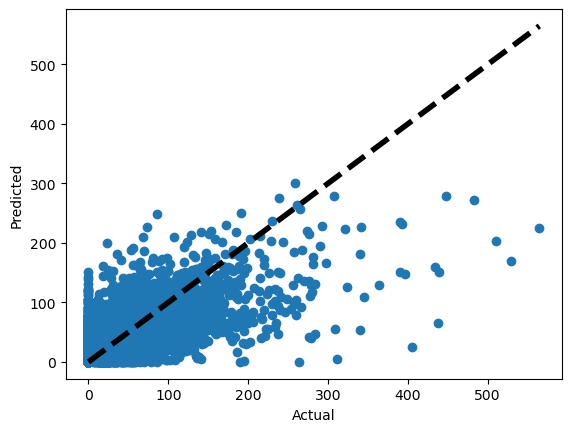

In [114]:
plt.subplots()
plt.scatter(y_test_reg, regr_predicted)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Randomforestregressor is my best model because it has:

- A lower Mean Square Error (better accuracy).
- A higher R-squared value (better explanation of variance).

a) Accuracy: R-squared = 0.543 means that 54.3% of the variance in the dependent variable is explained by the model 

b) Top five varaibles considered important to predict TICKET_BAL are `life_spend_amt, conc_bal, ol_fee_waive_amt, age, concloydisc` 

## Part III: Clustering

In [115]:
df_reg.head()

,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,0,0,0,0,1,1,0,0,0,0,0.0,0.00,0.0,8,19,0,29.58,0,0.00,0.0,0,0,8
1,0,0,1,3,1,1,1,0,1,0,5.0,-63.04,0.0,8,19,3,191.90,0,0.00,0.0,0,0,23
2,1,0,0,0,1,1,0,0,0,0,0.0,34.00,10.0,8,19,1,192.84,1,-8.49,0.0,0,0,71
3,1,0,0,0,0,0,0,0,0,0,0.0,0.00,0.0,8,19,1,0.00,1,0.00,0.0,0,0,62
4,1,0,0,0,0,0,0,0,0,0,0.0,12.08,5.0,8,19,3,101.20,0,0.00,0.0,0,0,59


In [116]:
df_reg.columns

Index(['age21plus', 'age18to21', 'age13to18', 'gendercode',
       'loyalty_email_offer', 'reward_email', 'reward_mobile', 'reward_sms',
       'theatr_mob_offer', 'theatr_sms_offer', 'life_award_amt',
       'life_spend_amt', 'ol_fee_waive_amt', 'est_inc_rng', 'est_home_val_rng',
       'child_pres', 'ticket_bal', 'concqtysum', 'concloydisc', 'conc_bal',
       'unk_inc', 'unk_home', 'age'],
      dtype='object')

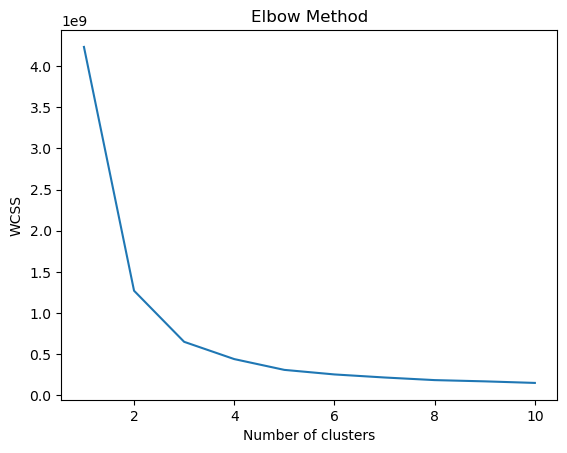

In [117]:
# 1) Analyze the data using the K-means algorithm

# Elbow method to determine the optimal K value for K-means analysis

# WCSS: Within cluster sum of squares
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++',                     
                    n_init='auto', 
                    random_state=0)
    kmeans.fit(df_reg)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K = 3

In [118]:
# normalize data and save as X

X = (df_reg - df_reg.mean()) / (df_reg.max() - df_reg.min())
X.head()

,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,-0.892628,-0.063939,-0.038555,-0.820256,0.183187,0.140858,-0.503096,-0.000042,-0.508101,-0.000042,-0.006038,-0.006456,-0.001139,0.772681,0.888806,-0.893116,0.011478,-0.022606,0.011150,-0.021879,-0.83028,-0.786084,-0.411165
1,-0.892628,-0.063939,0.961445,0.179744,0.183187,0.140858,0.496904,-0.000042,0.491899,-0.000042,0.000181,-0.014342,-0.001139,0.772681,0.888806,0.106884,0.287532,-0.022606,0.011150,-0.021879,-0.83028,-0.786084,-0.248122
2,0.107372,-0.063939,-0.038555,-0.820256,0.183187,0.140858,-0.503096,-0.000042,-0.508101,-0.000042,-0.006038,-0.002203,0.004371,0.772681,0.888806,-0.559783,0.289131,-0.011112,-0.469054,-0.021879,-0.83028,-0.786084,0.273617
3,0.107372,-0.063939,-0.038555,-0.820256,-0.816813,-0.859142,-0.503096,-0.000042,-0.508101,-0.000042,-0.006038,-0.006456,-0.001139,0.772681,0.888806,-0.559783,-0.038828,-0.011112,0.011150,-0.021879,-0.83028,-0.786084,0.175791
4,0.107372,-0.063939,-0.038555,-0.820256,-0.816813,-0.859142,-0.503096,-0.000042,-0.508101,-0.000042,-0.006038,-0.004945,0.001616,0.772681,0.888806,0.106884,0.133280,-0.022606,0.011150,-0.021879,-0.83028,-0.786084,0.143183


In [119]:
# variance test

X.var()

age21plus              0.095845
age18to21              0.059852
age13to18              0.037069
gendercode             0.130016
loyalty_email_offer    0.149633
reward_email           0.121019
reward_mobile          0.249996
reward_sms             0.000042
theatr_mob_offer       0.249940
theatr_sms_offer       0.000042
life_award_amt         0.001460
life_spend_amt         0.001343
ol_fee_waive_amt       0.000188
est_inc_rng            0.075254
est_home_val_rng       0.059598
child_pres             0.072968
ticket_bal             0.004357
concqtysum             0.002379
concloydisc            0.003296
conc_bal               0.002109
unk_inc                0.140918
unk_home               0.168160
age                    0.025346
dtype: float64

In [120]:
# clustering analysis with k = 3

k_means = KMeans(init='k-means++', 
                 n_init='auto',
                 n_clusters=3, 
                 random_state=0)

k_means.fit(X)

KMeans(n_clusters=3, random_state=0)

In [121]:
# To add cluster label into the dataset as a column
df_mean = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df_mean.head()

,cluster
0,2
1,2
2,2
3,2
4,2


In [122]:
df_reg = df_reg.reset_index(drop=True)
df_mean = df_mean.reset_index(drop=True)

df_cluster = df_reg.join(df_mean)
df_cluster.head()

,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age,cluster
0,0,0,0,0,1,1,0,0,0,0,0.0,0.00,0.0,8,19,0,29.58,0,0.00,0.0,0,0,8,2
1,0,0,1,3,1,1,1,0,1,0,5.0,-63.04,0.0,8,19,3,191.90,0,0.00,0.0,0,0,23,2
2,1,0,0,0,1,1,0,0,0,0,0.0,34.00,10.0,8,19,1,192.84,1,-8.49,0.0,0,0,71,2
3,1,0,0,0,0,0,0,0,0,0,0.0,0.00,0.0,8,19,1,0.00,1,0.00,0.0,0,0,62,2
4,1,0,0,0,0,0,0,0,0,0,0.0,12.08,5.0,8,19,3,101.20,0,0.00,0.0,0,0,59,2


In [123]:
df_cluster.tail()

,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age,cluster
47149,1,0,0,3,1,1,1,0,1,0,0.0,2.92,0.0,0,0,3,0.00,2,0.0,15.47,1,1,29,0
47150,1,0,0,3,1,1,0,0,0,0,0.0,0.00,0.0,0,0,3,0.00,0,0.0,0.00,1,1,29,1
47151,1,0,0,3,1,1,1,0,1,0,0.0,0.00,0.0,0,0,3,8.99,0,0.0,0.00,1,1,29,0
47152,1,0,0,3,1,1,1,0,1,0,0.0,2.72,0.0,0,0,3,0.00,4,0.0,28.97,1,1,8,0
47153,1,0,0,3,1,1,1,0,1,0,0.0,7.34,0.0,0,0,3,72.08,2,0.0,13.44,1,1,8,0


In [124]:
df_cluster.groupby('cluster').mean()

,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,0.880711,0.066394,0.048120,2.839432,0.985628,0.987603,0.996051,0.000000,0.999082,0.000000,1.611532,20.606354,0.499874,0.027871,0.265944,2.988567,18.064065,2.547408,-0.195865,14.737055,0.994949,0.971670,46.138803
1,0.886617,0.073056,0.037242,2.244988,0.630434,0.720969,0.001485,0.000000,0.006112,0.000000,1.227382,16.594262,2.409907,0.016165,0.954647,2.986463,22.714517,0.786086,-0.102982,4.494235,0.996002,0.892957,43.800880
2,0.938993,0.036858,0.014997,1.892730,0.764235,0.811007,0.254703,0.000254,0.266014,0.000254,21.903325,215.343665,5.640283,6.154931,9.801347,1.140061,36.286136,2.986401,-0.410098,17.020738,0.005719,0.034570,49.473437


### Build Decision Tree Model

In [125]:
y = df_cluster['cluster'].values
X = df_cluster.drop(['cluster'], axis=1)

In [126]:
X.head()

,age21plus,age18to21,age13to18,gendercode,loyalty_email_offer,reward_email,reward_mobile,reward_sms,theatr_mob_offer,theatr_sms_offer,life_award_amt,life_spend_amt,ol_fee_waive_amt,est_inc_rng,est_home_val_rng,child_pres,ticket_bal,concqtysum,concloydisc,conc_bal,unk_inc,unk_home,age
0,0,0,0,0,1,1,0,0,0,0,0.0,0.00,0.0,8,19,0,29.58,0,0.00,0.0,0,0,8
1,0,0,1,3,1,1,1,0,1,0,5.0,-63.04,0.0,8,19,3,191.90,0,0.00,0.0,0,0,23
2,1,0,0,0,1,1,0,0,0,0,0.0,34.00,10.0,8,19,1,192.84,1,-8.49,0.0,0,0,71
3,1,0,0,0,0,0,0,0,0,0,0.0,0.00,0.0,8,19,1,0.00,1,0.00,0.0,0,0,62
4,1,0,0,0,0,0,0,0,0,0,0.0,12.08,5.0,8,19,3,101.20,0,0.00,0.0,0,0,59


In [127]:
# instantiate a decision tree model, and fit with X and y
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

model = model.fit(X, y)    # without model validation since this model is not for prediction, but for explanation

# check the accuracy on the training set
model.score(X, y)

0.9945497730839378

The model accuracy is `99%`

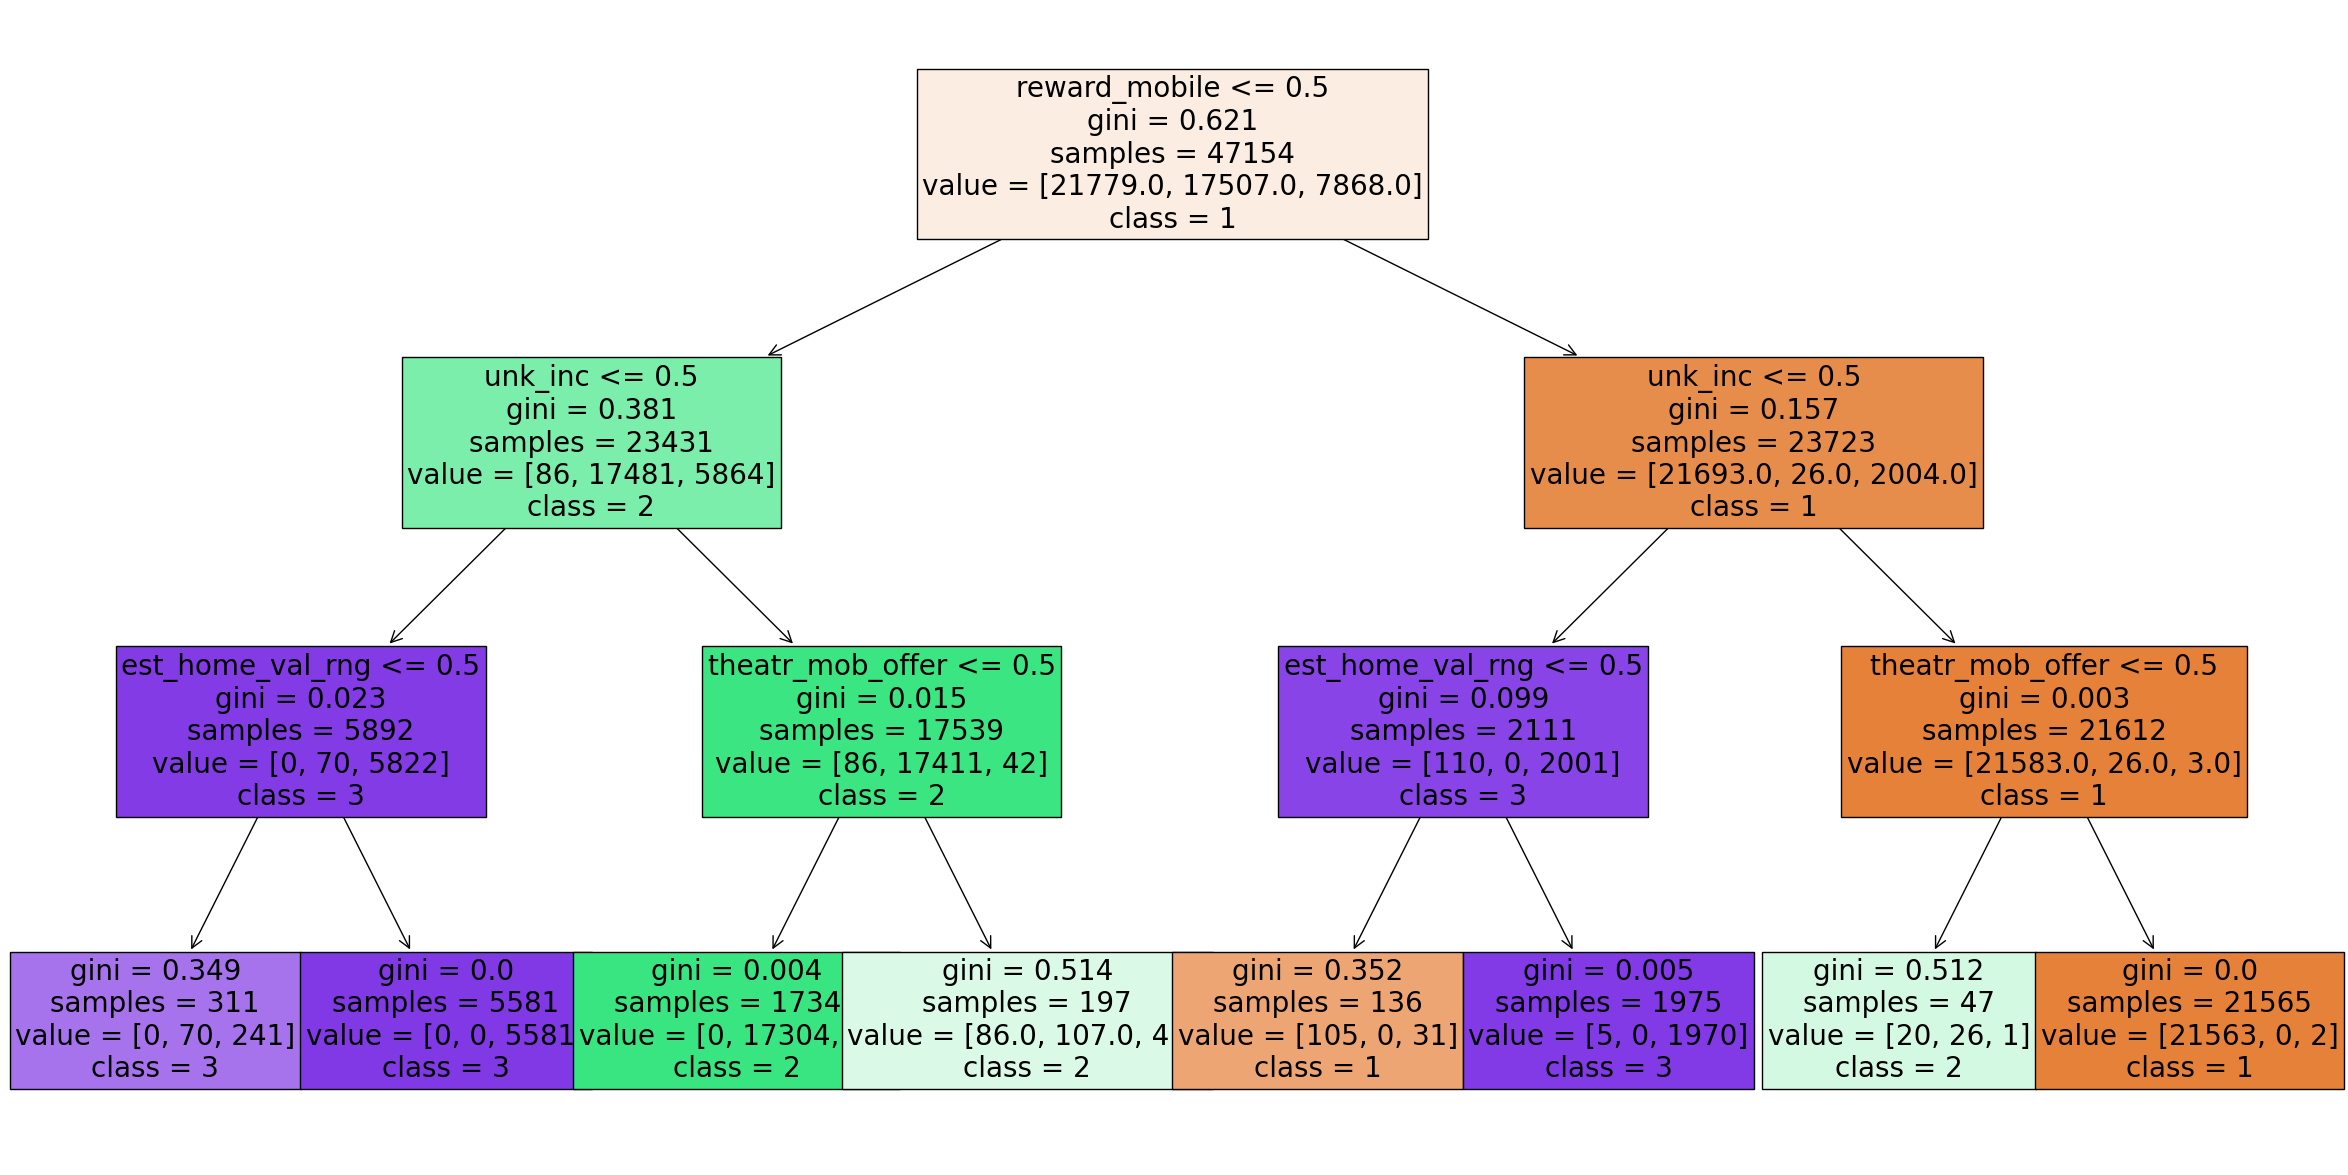

In [128]:
plt.figure(figsize=(30,15))
tree.plot_tree(model,
               feature_names = X.columns.tolist(), 
               class_names=['1','2','3'],
               fontsize=20,
               filled = True);

In [129]:
text_representation = tree.export_text(model, feature_names=(list(X.columns)))
print(text_representation)

|--- reward_mobile <= 0.50
|   |--- unk_inc <= 0.50
|   |   |--- est_home_val_rng <= 0.50
|   |   |   |--- class: 2
|   |   |--- est_home_val_rng >  0.50
|   |   |   |--- class: 2
|   |--- unk_inc >  0.50
|   |   |--- theatr_mob_offer <= 0.50
|   |   |   |--- class: 1
|   |   |--- theatr_mob_offer >  0.50
|   |   |   |--- class: 1
|--- reward_mobile >  0.50
|   |--- unk_inc <= 0.50
|   |   |--- est_home_val_rng <= 0.50
|   |   |   |--- class: 0
|   |   |--- est_home_val_rng >  0.50
|   |   |   |--- class: 2
|   |--- unk_inc >  0.50
|   |   |--- theatr_mob_offer <= 0.50
|   |   |   |--- class: 1
|   |   |--- theatr_mob_offer >  0.50
|   |   |   |--- class: 0



### Customer Profiles

#### Class 0: Likely to be Casual or Less Engaged Customers

+ Behavior:

    - Opt-in for mobile notifications (reward_mobile > 0.50).
    - Low estimated income range (unk_inc <= 0.50) and low home market value (est_home_val_rng <= 0.50) result in Class 0.
    - Higher income (unk_inc > 0.50) with opting out of theatre-level offers (theatr_mob_offer <= 0.50) also results in Class 0.
+ Demographics:

    - Low-income customers or those who are less interested in engaging via mobile theatre offers.

#### Class 1: Likely to be Engaged Customers (Premier or Loyal Insiders)

+ Behavior:

    - Does not opt-in for mobile notifications (reward_mobile <= 0.50).
    - Lower estimated income range (est_inc_rng <= 0.50).
    - May or may not opt-in for mobile theatre-level offers (theatr_mob_offer) 

+ Demographics:
    - This group generally has lower income, indicating price-sensitive but engaged customers.

#### Class 2: Likely to be Potential Upsell Customers

+ Behavior:

    - Does not opt-in for mobile notifications (reward_mobile <= 0.50).
    - Higher estimated income range (est_inc_rng > 0.50).
    - Estimated home market value (unk_home) determines segmentation:
    - Low home market value (unk_home <= 0.50).
    - High home market value (unk_home > 0.50).

+ Demographics:
    - Higher income and higher home market value suggest customers who may value premium offers but are less engaged digitally.


## Part IV: Storytelling

Customers are likely to covert to `Premier` by having the following characteristics:

- customers who spend more
- are frequent ticket purchasers
- have high ticket balances
- spending more on concessions 
- higher-income individuals 
- tech-savvy customers engaging with mobile offers
- older customers
- earn more loyalty rewards

Customers who utilize `Premier` have the following characteristics:

- slightly older customers
- higher socioeconomic status (high income range and high home market value)
- higher lifetime spend amount
- higher ticket balance
- higher ticket quantity 
- higher concession quantity 
- higher concession balance 
- more likely to opt-in to mobile-related offers Theatre Mobile Offer Opt-In, Reward Mobile Opt-In 
- accumulate significant loyalty rewards

Customers who utilize `Insider` have the following characteristics:

- likely younger customers
- lower Estimated Income Range and Estimated Home Market Value
- lower lifetime spend amount and ticket balance
- lower concession quantity and concession balance
- customers who visit frequently but spend less
- less likely to opt-in to advanced features like Mobile and Reward Mobile Offers and Loyalty Email Offers
- accumulate fewer loyalty rewards
- more likely to have children

### Customer segmentation

| **Class** | **Behavior**                                             | **Demographics**                                | **Marketing Insights**                                       |
|-----------|----------------------------------------------------------|------------------------------------------------|-------------------------------------------------------------|
| **Class 1** | Low income, moderate theatre engagement                | Price-sensitive, low engagement                | Target low-cost promotions, discounts, and mobile offers.   |
| **Class 2** | High income, low mobile engagement                     | High-income, premium customers                 | Focus on premium services and personalized email campaigns. |
| **Class 0** | Casual, low spending, some mobile engagement           | Low-income, low home value, less committed     | Use re-engagement campaigns with mobile notifications.      |
